In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from pathlib import Path    
import sys, os
parent_dir = str(Path().resolve().parents[1])
sys.path.insert(0, parent_dir)
import analysis.scripts.pwa_tools as pwa_tools

# change some plot parameters to look better
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["figure.dpi"] = 500
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["xtick.major.width"] = 2.0
plt.rcParams["xtick.minor.width"] = 1.8
plt.rcParams["ytick.major.width"] = 2.0
plt.rcParams["ytick.minor.width"] = 1.8
plt.rcParams["lines.markersize"] = 12

In [2]:
# loop over all csv's and collect them into 2 lists
path = f"{parent_dir}/analysis/data/ppi0_mass_cut_compare"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

df_list = []
df_data_list = []

for csv in csv_files:
    # the following assumes string always in form "mass-cut_t-bin1-bin2(_data).csv". () denote its optional
    i = csv.index("_")
    mass_cut = csv[0:i]
    t_range = csv[i+3:i+10]
    if mass_cut == "0.0": 
        continue
    if "data" in csv:
        print(f"Adding data df:\t{csv}")                
        df_data = pd.read_csv(f"{path}/{csv}")
        df_data["cut"] = mass_cut
        df_data["t"] = t_range   
        df_data.drop([20, 21, 22, 23, 24], inplace=True, axis="index")
        df_data_list.append(df_data)
    else:
        print(f"Adding fit df:\t{csv}")
        df = pd.read_csv(f"{path}/{csv}", index_col="index")
        df["cut"] = mass_cut
        df["t"] = t_range
        df.drop([20, 21, 22, 23, 24], inplace=True, axis="index")
        pwa_tools.wrap_phases(df)
        df_list.append(df)

df = pd.concat(df_list)
df_data = pd.concat(df_data_list)

MASS_BINS = df_data[df_data["t"]=="0.1-0.2"]["mean"]
bin_width = (df_data[df_data["t"]=="0.1-0.2"]["high_edge"] - df_data[df_data["t"]=="0.1-0.2"]["low_edge"])[0]
coherent_sums = pwa_tools.get_coherent_sums(df)
phase_differences = pwa_tools.get_phase_differences(df)

Adding fit df:	1.4_t-0.5-0.9.csv
Adding data df:	1.4_t-0.5-0.9_data.csv
Adding fit df:	1.4_t-0.2-0.3.csv
Adding fit df:	1.4_t-0.3-0.5.csv
Adding data df:	1.4_t-0.3-0.5_data.csv
Adding data df:	1.4_t-0.1-0.2_data.csv
Adding fit df:	1.4_t-0.1-0.2.csv
Adding data df:	1.4_t-0.2-0.3_data.csv


In [3]:
plotter_bin_1 = pwa_tools.Plotter(df[df["t"]=="0.1-0.2"], df_data[df_data["t"]=="0.1-0.2"])
plotter_bin_2 = pwa_tools.Plotter(df[df["t"]=="0.2-0.3"], df_data[df_data["t"]=="0.2-0.3"])
plotter_bin_3 = pwa_tools.Plotter(df[df["t"]=="0.3-0.5"], df_data[df_data["t"]=="0.3-0.5"])
plotter_bin_4 = pwa_tools.Plotter(df[df["t"]=="0.5-0.9"], df_data[df_data["t"]=="0.5-0.9"])

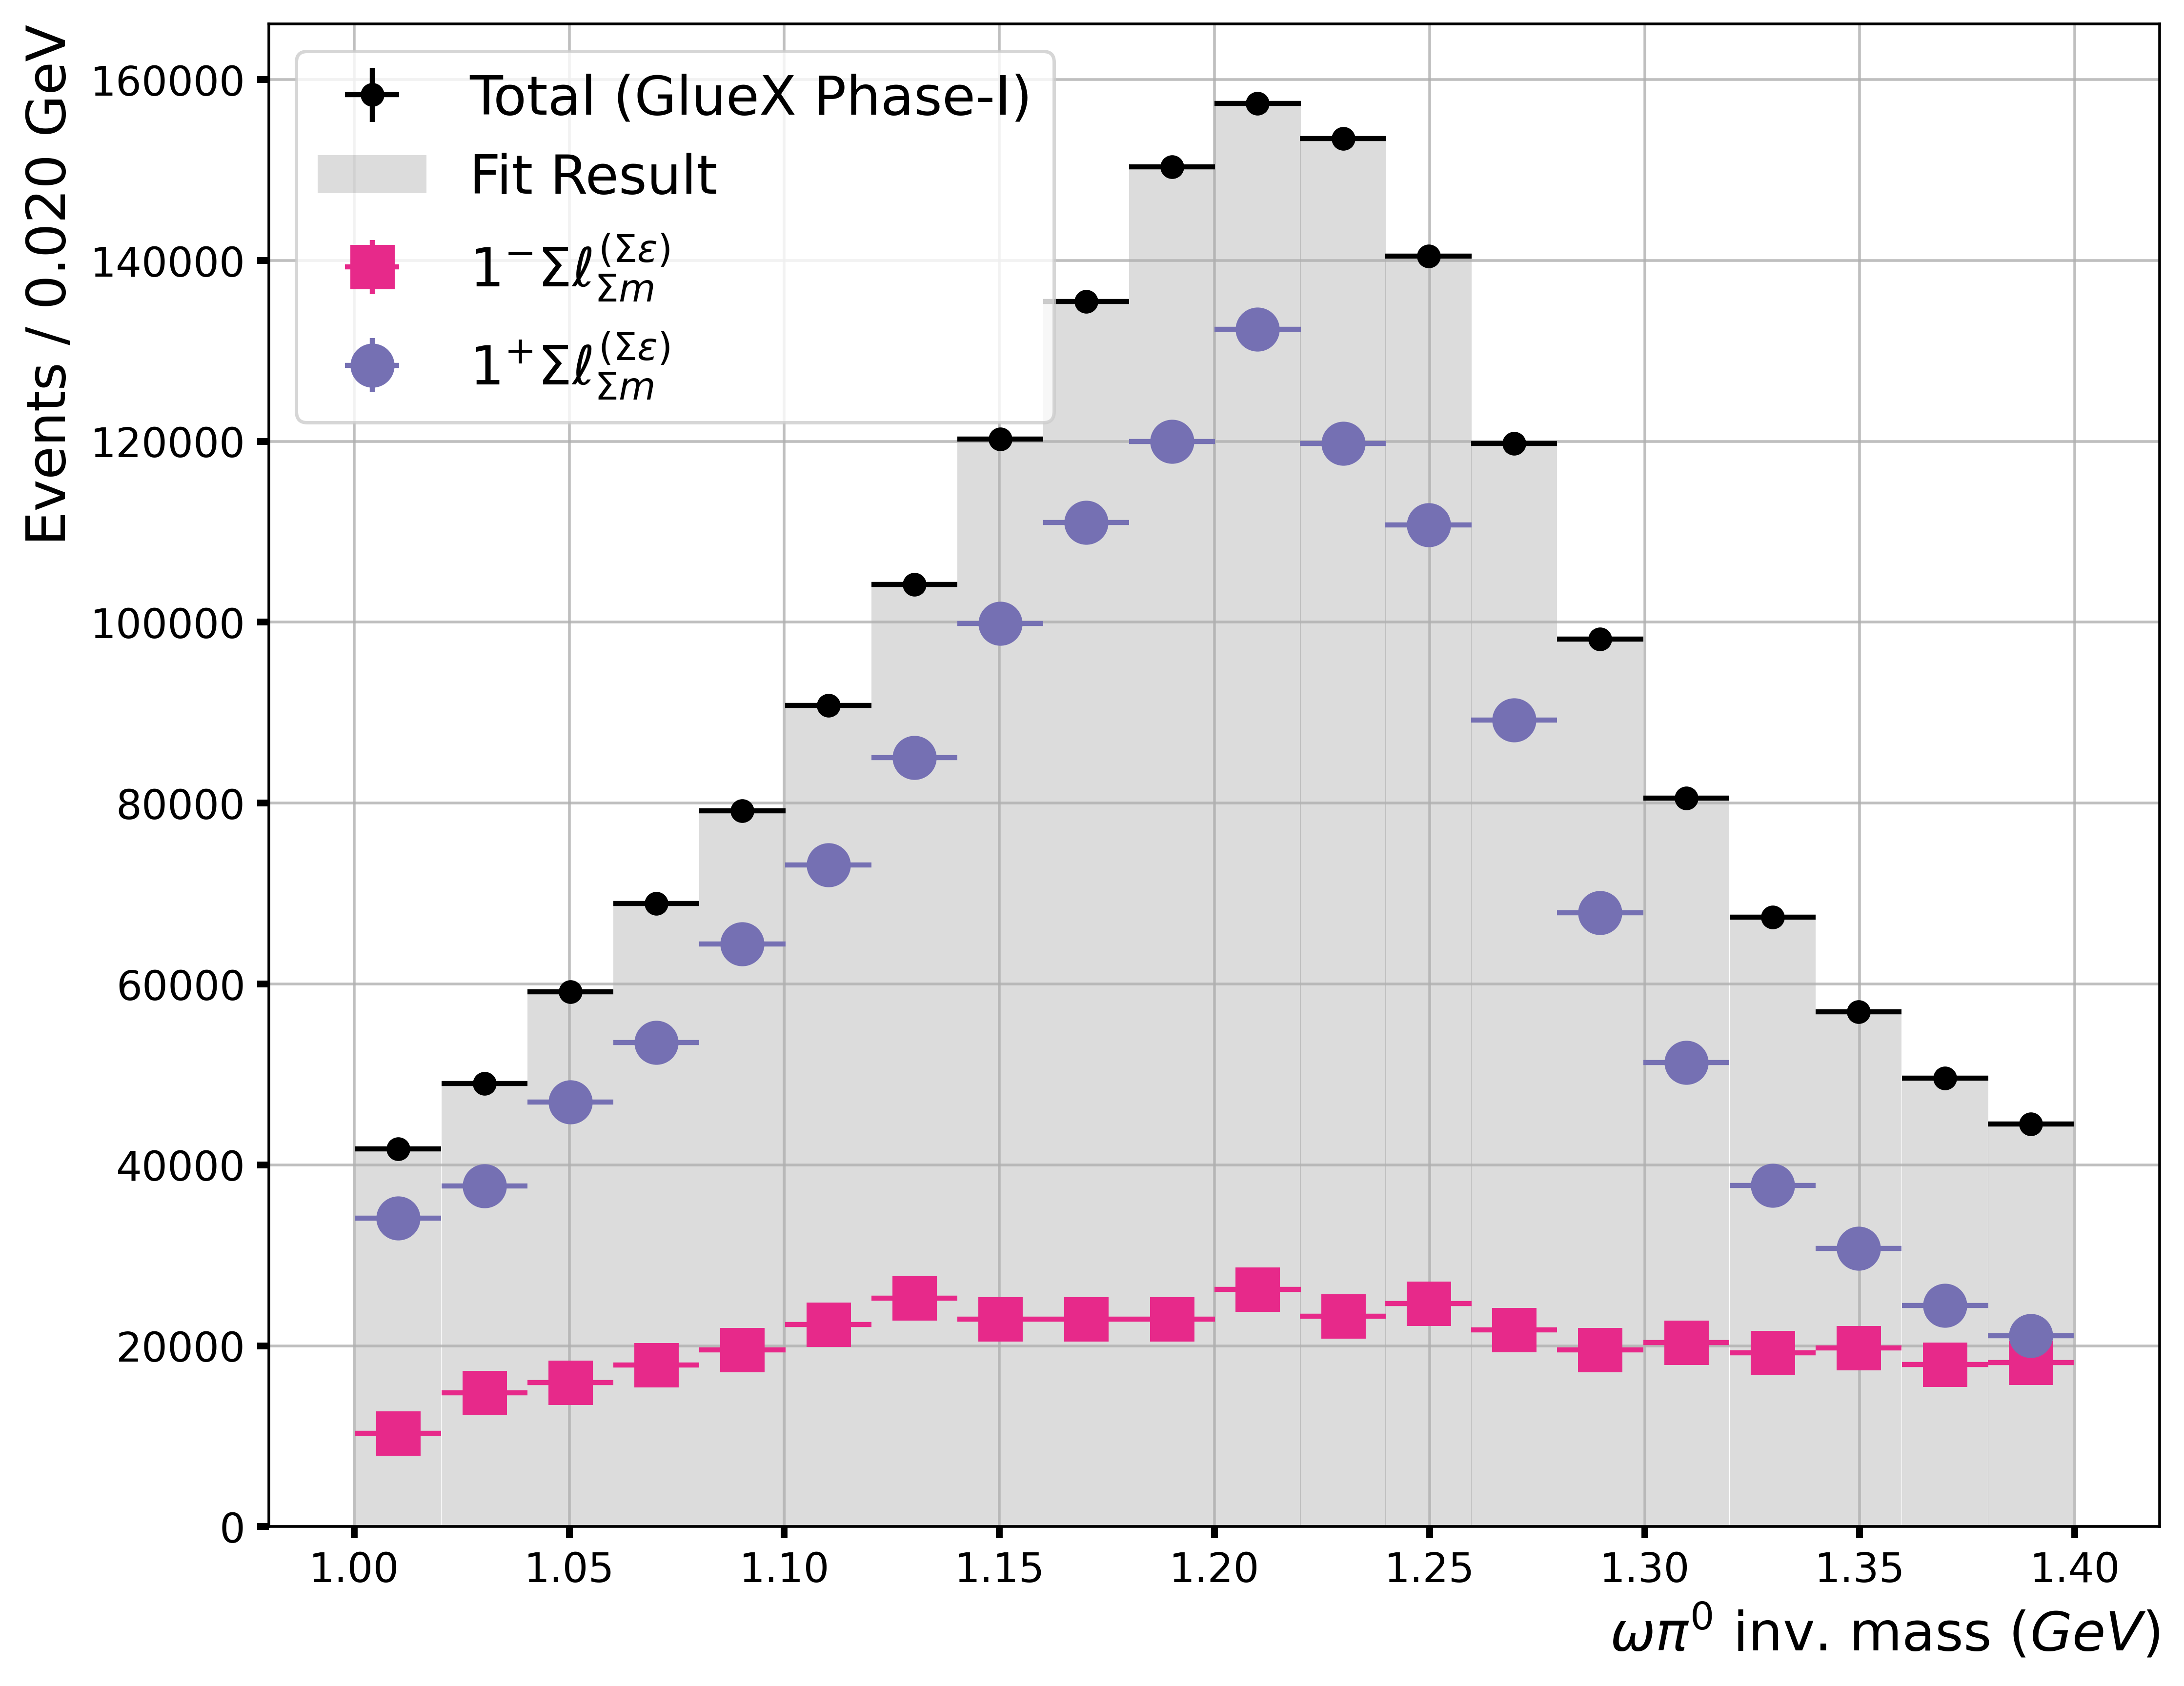

In [4]:
plotter_bin_1.jp()
#plotter_bin_2.jp()
#plotter_bin_3.jp()
#plotter_bin_4.jp()

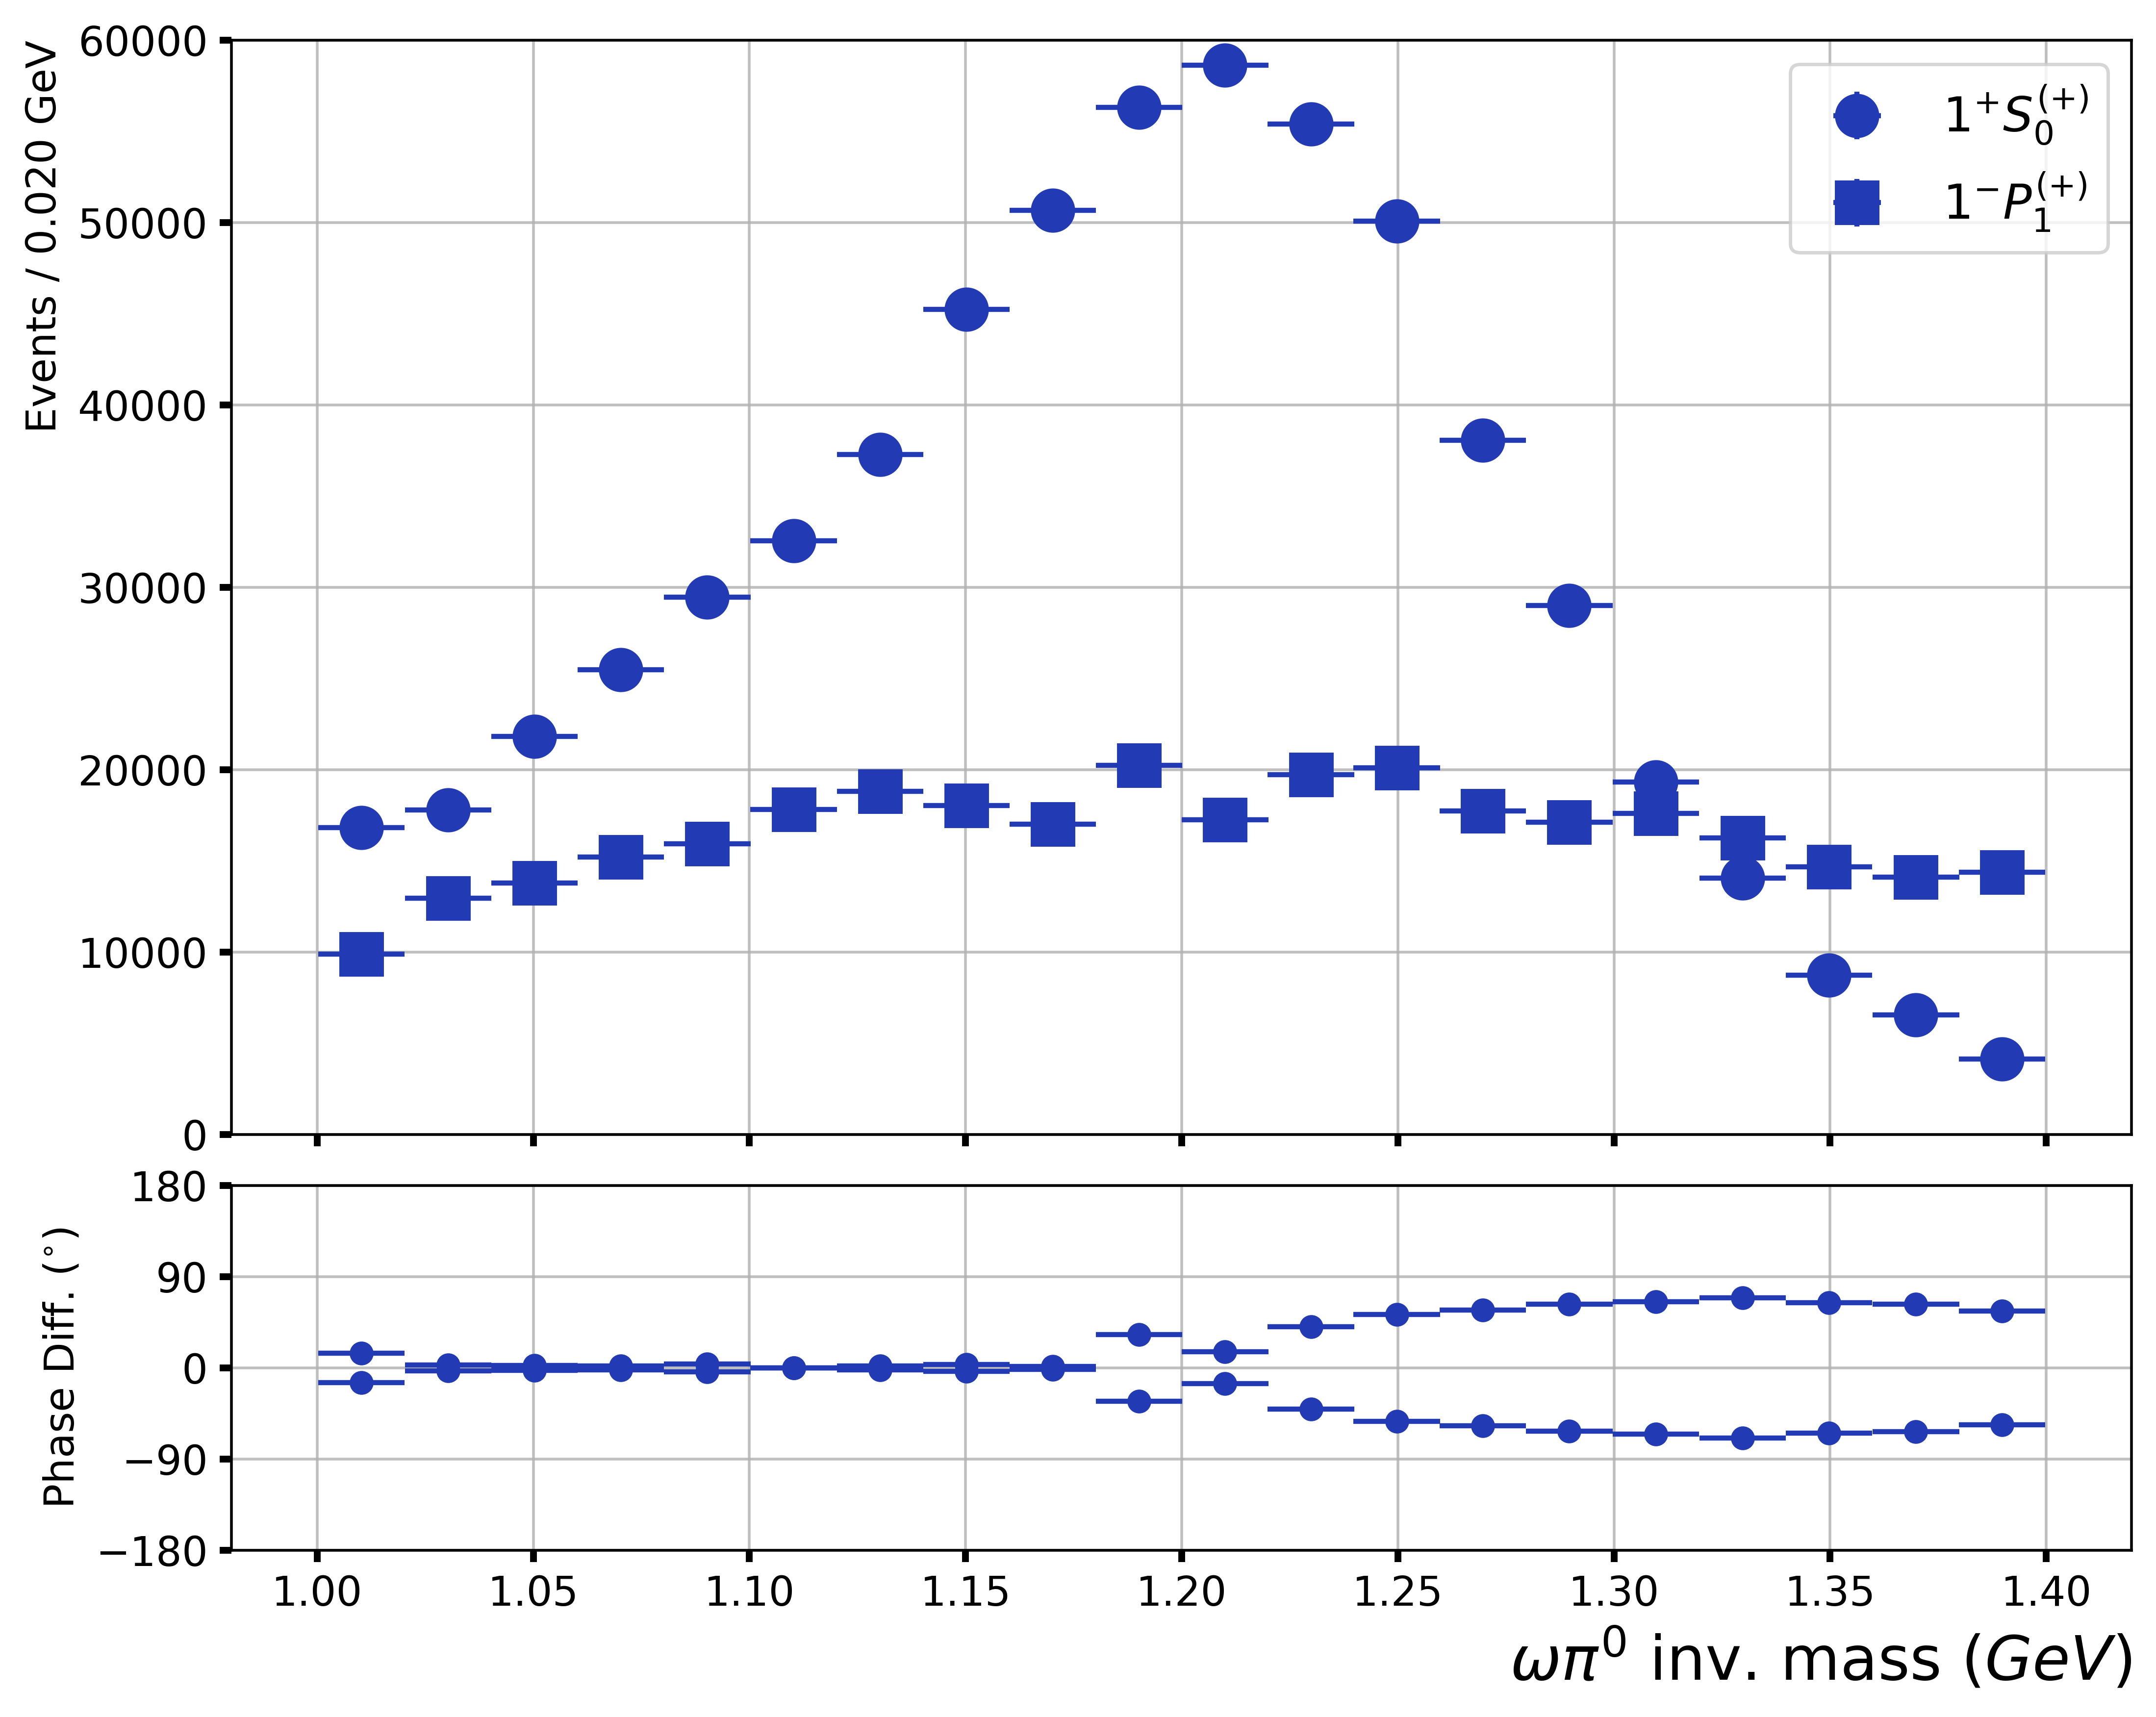

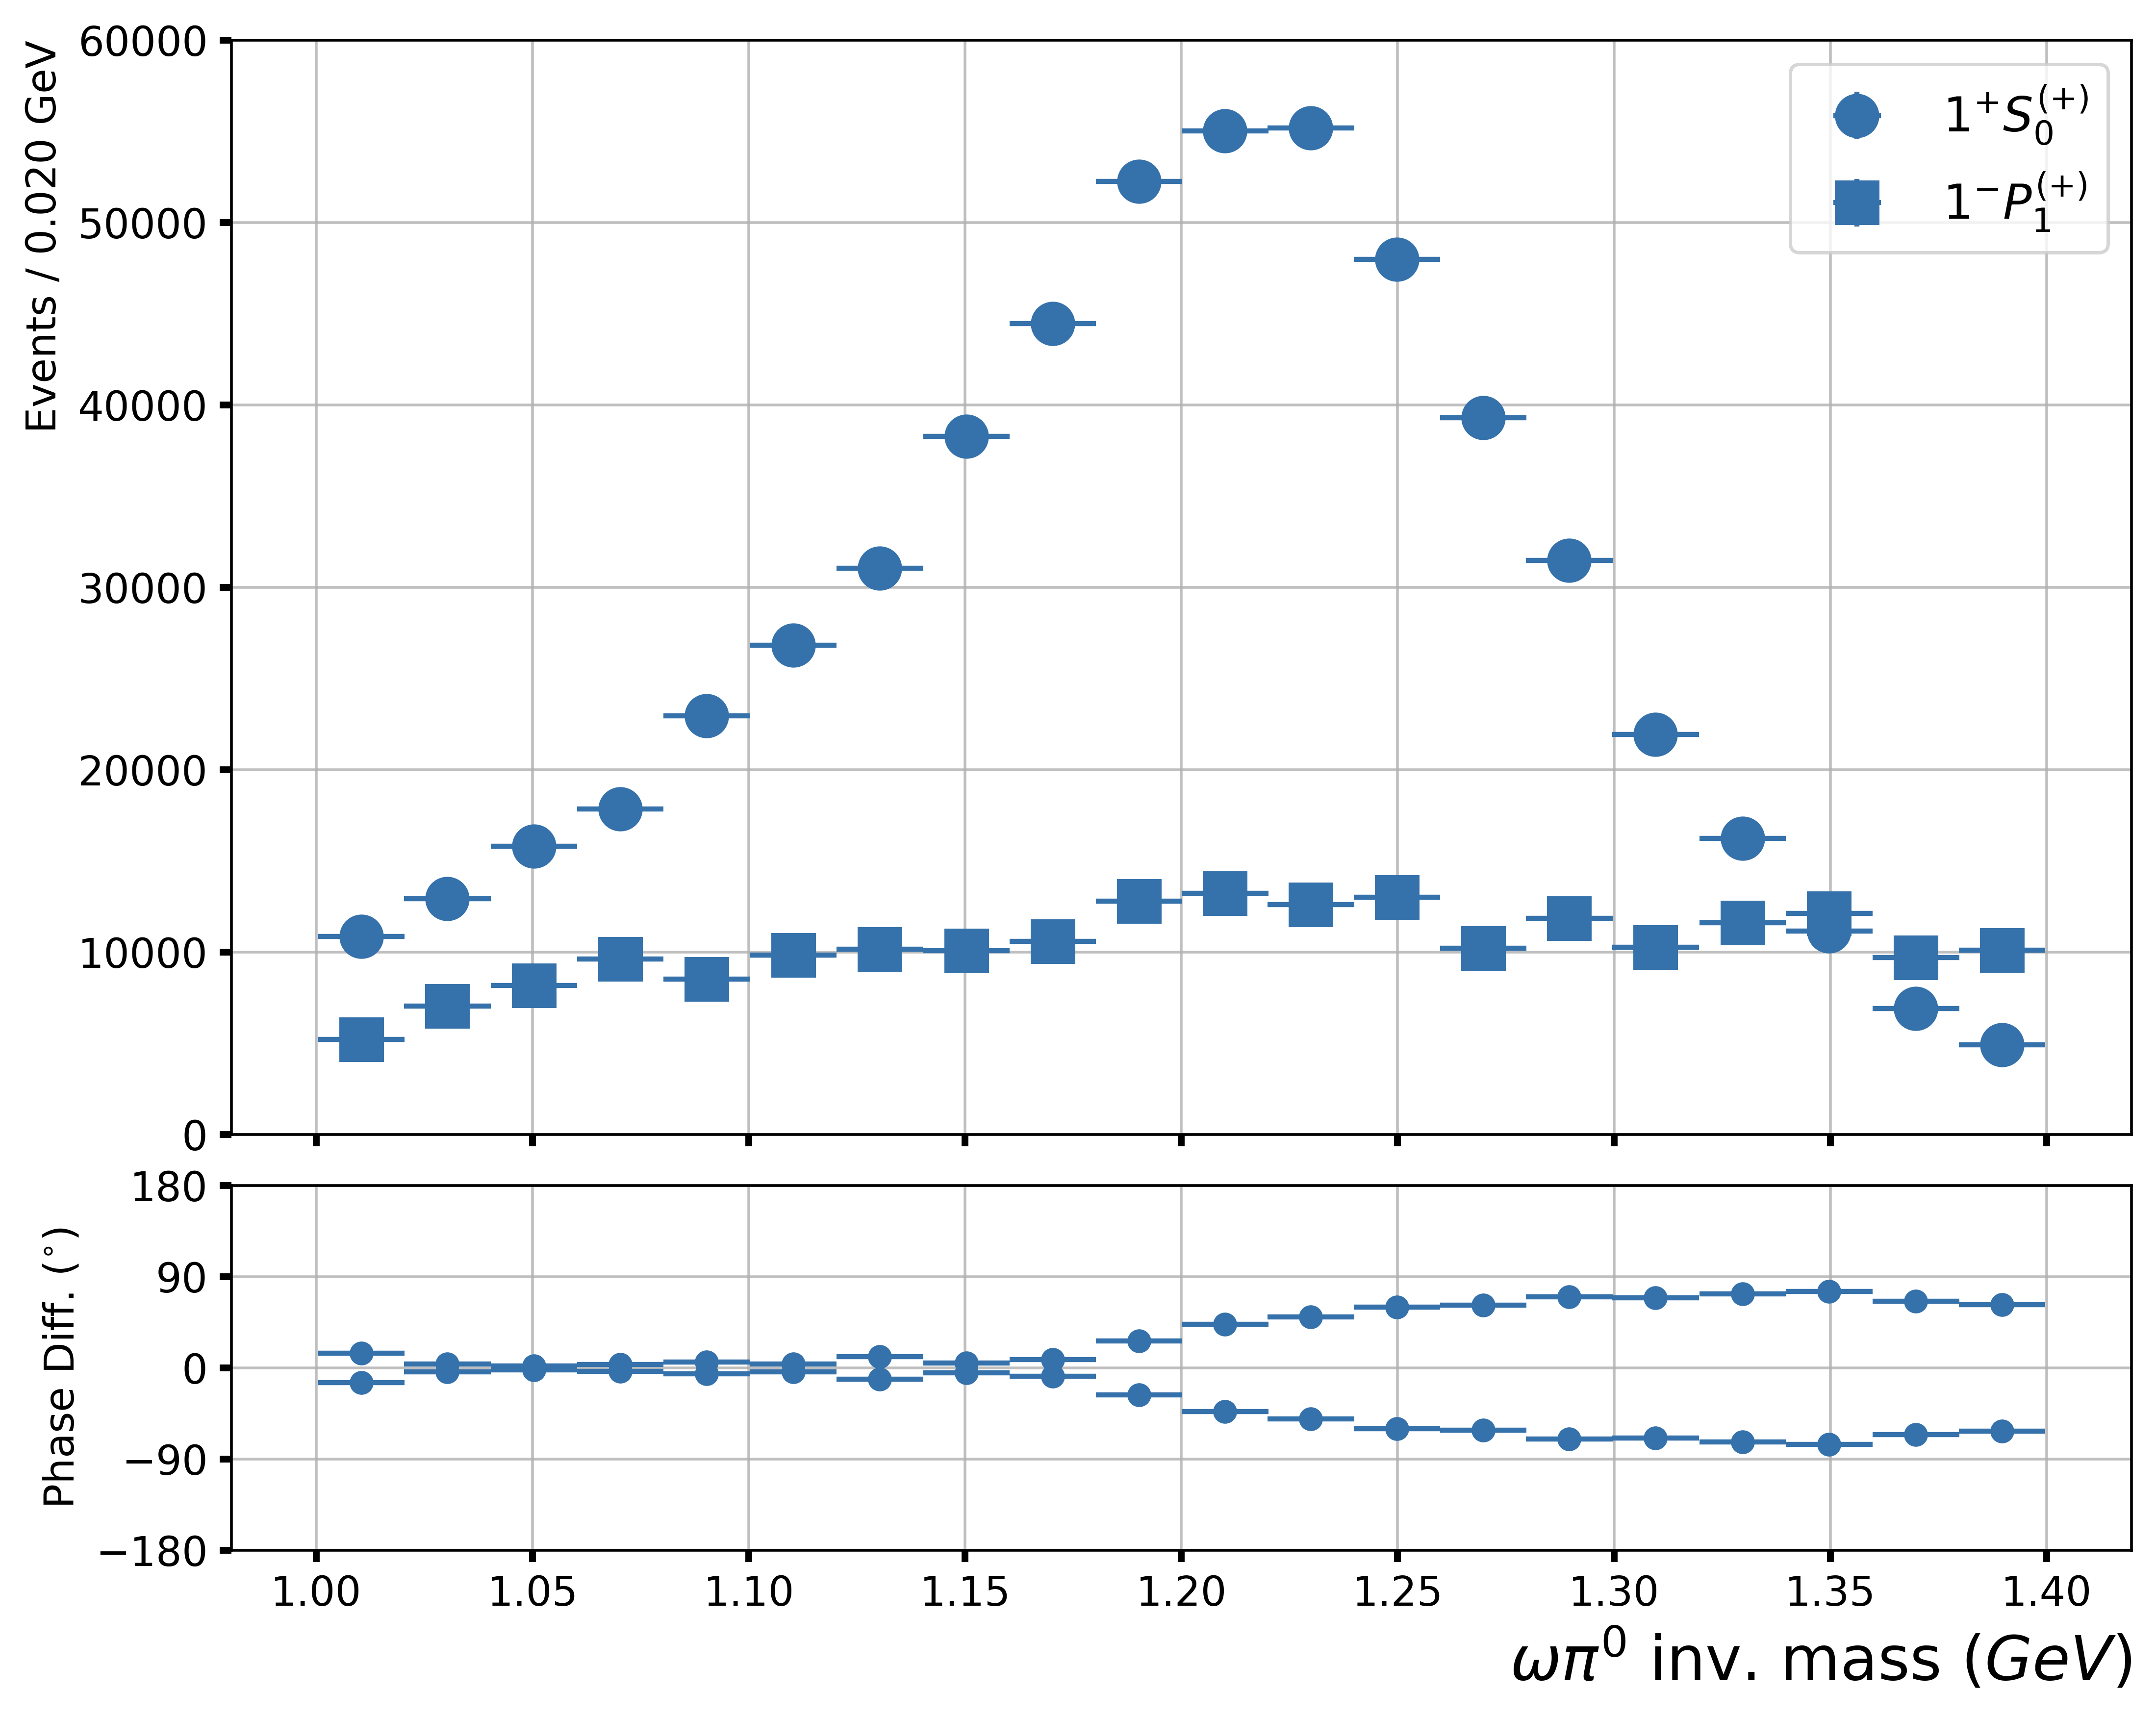

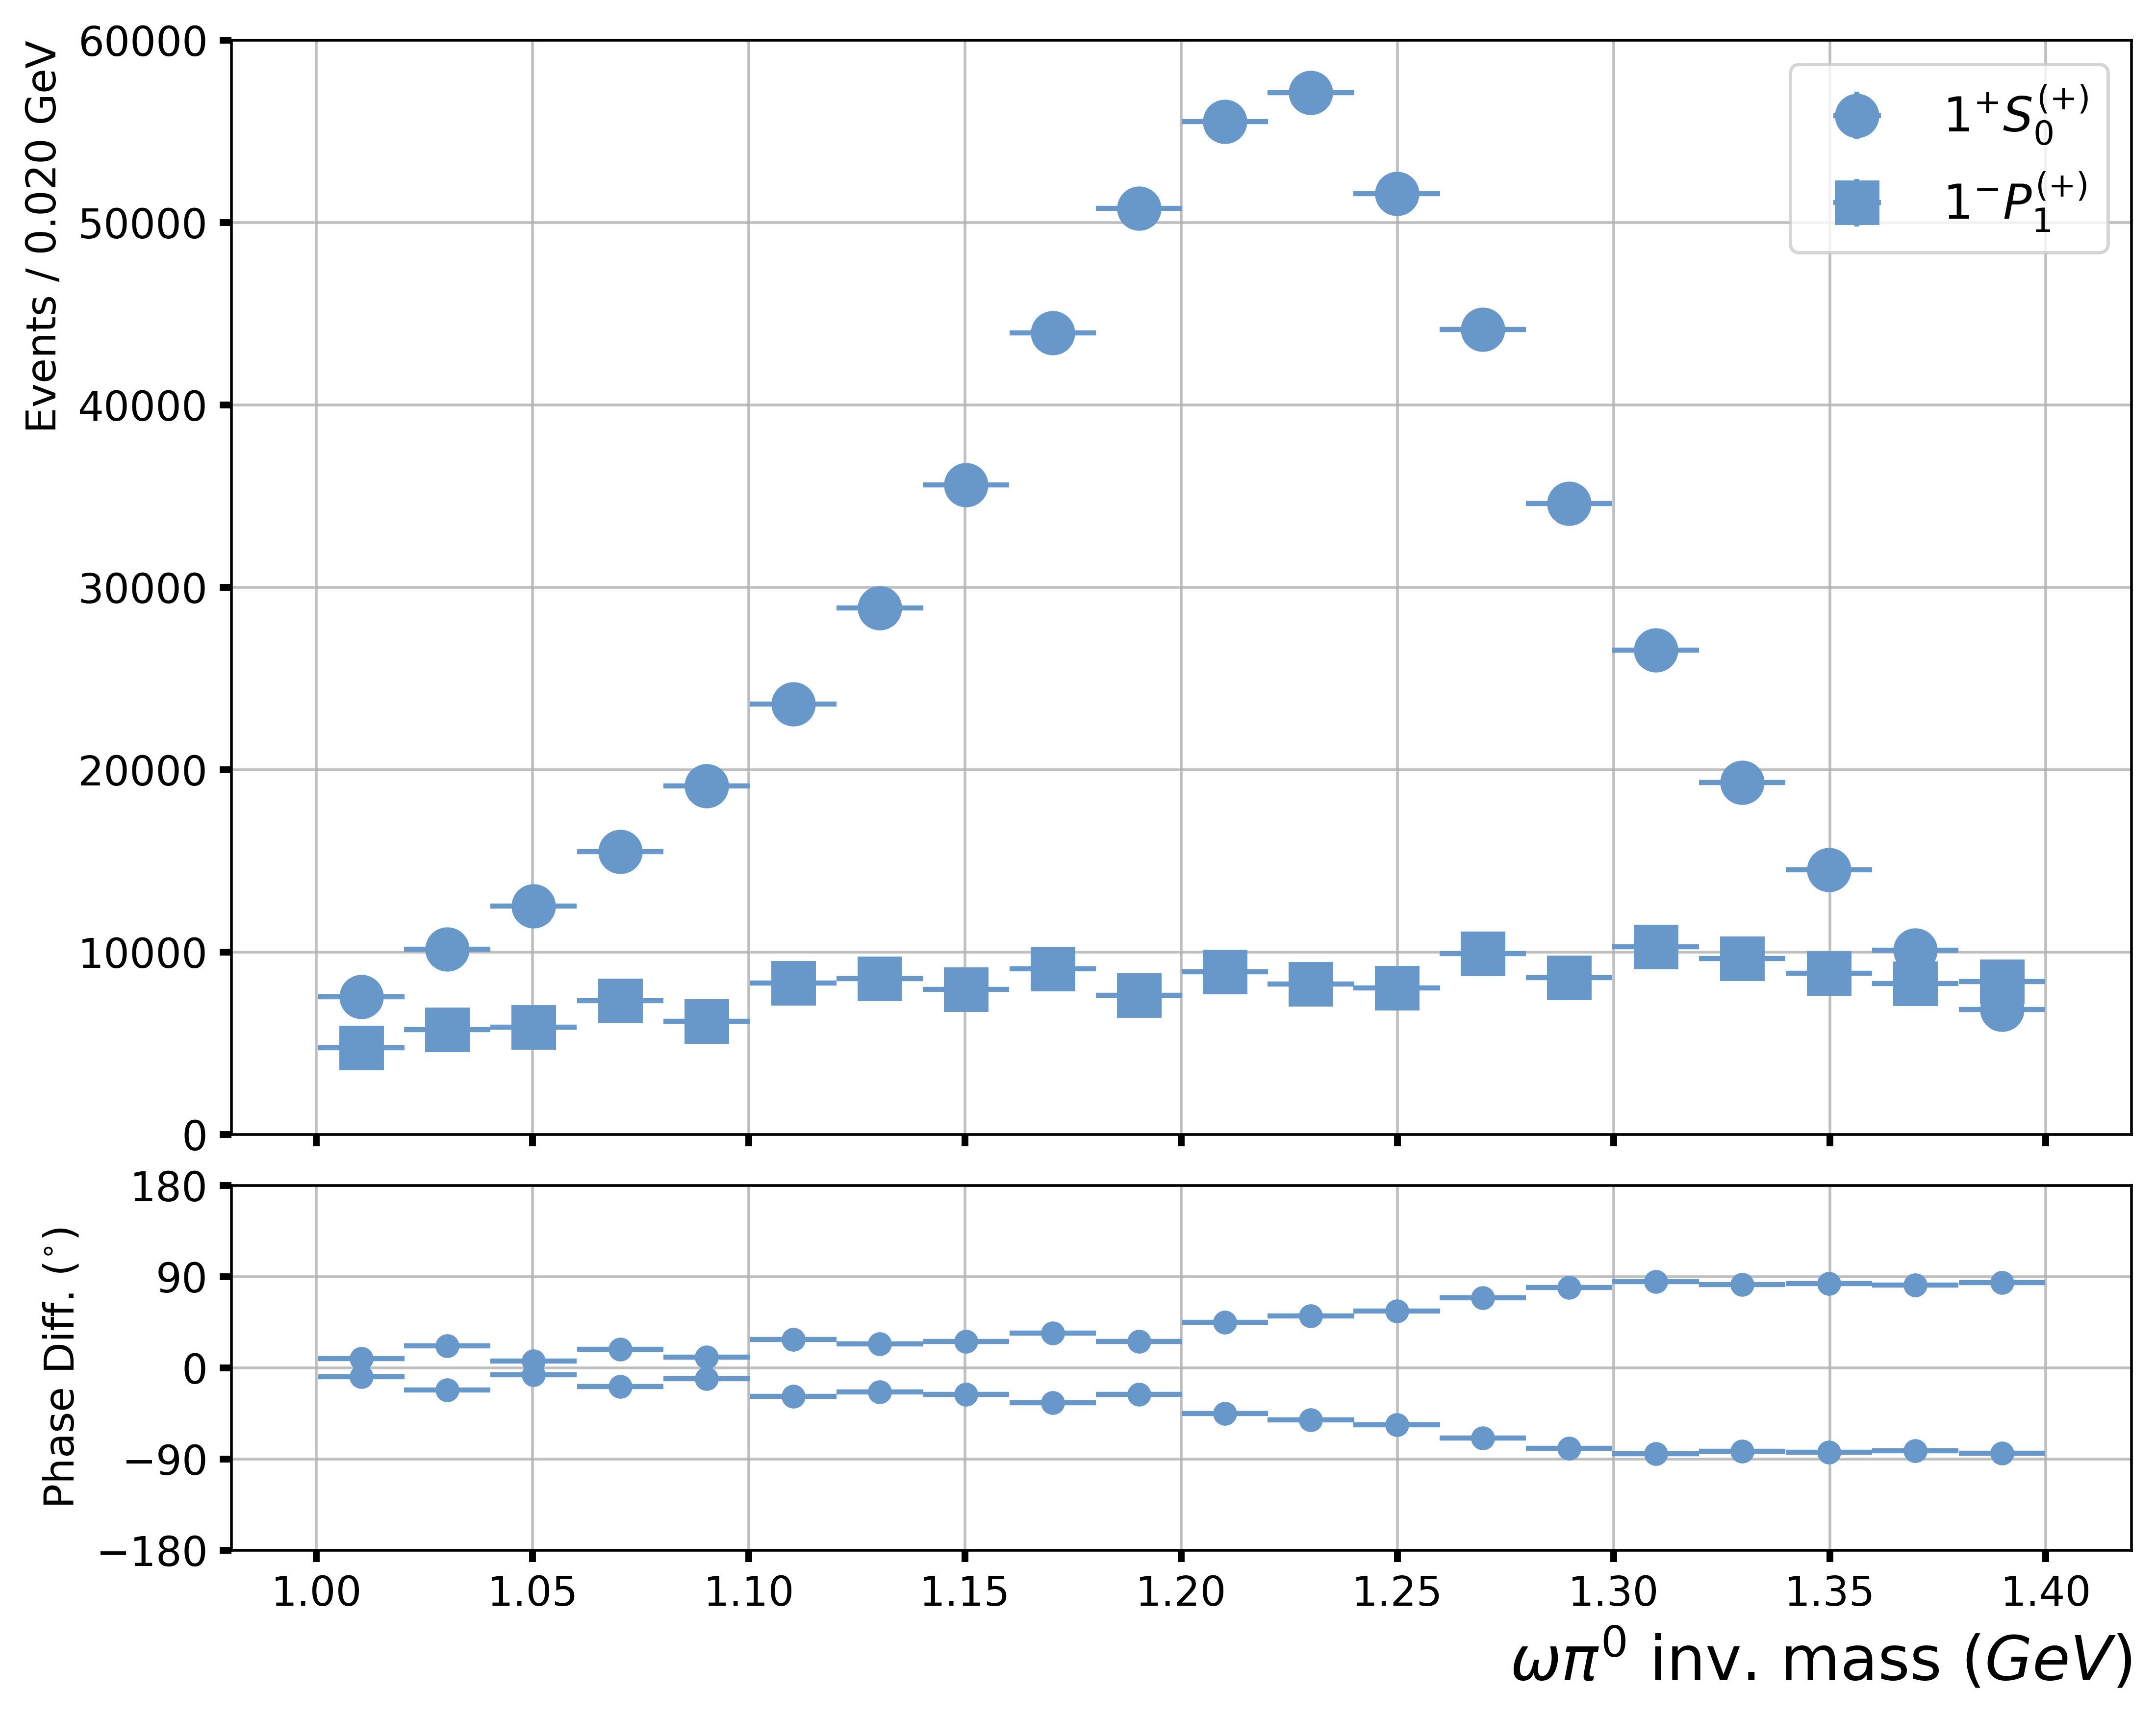

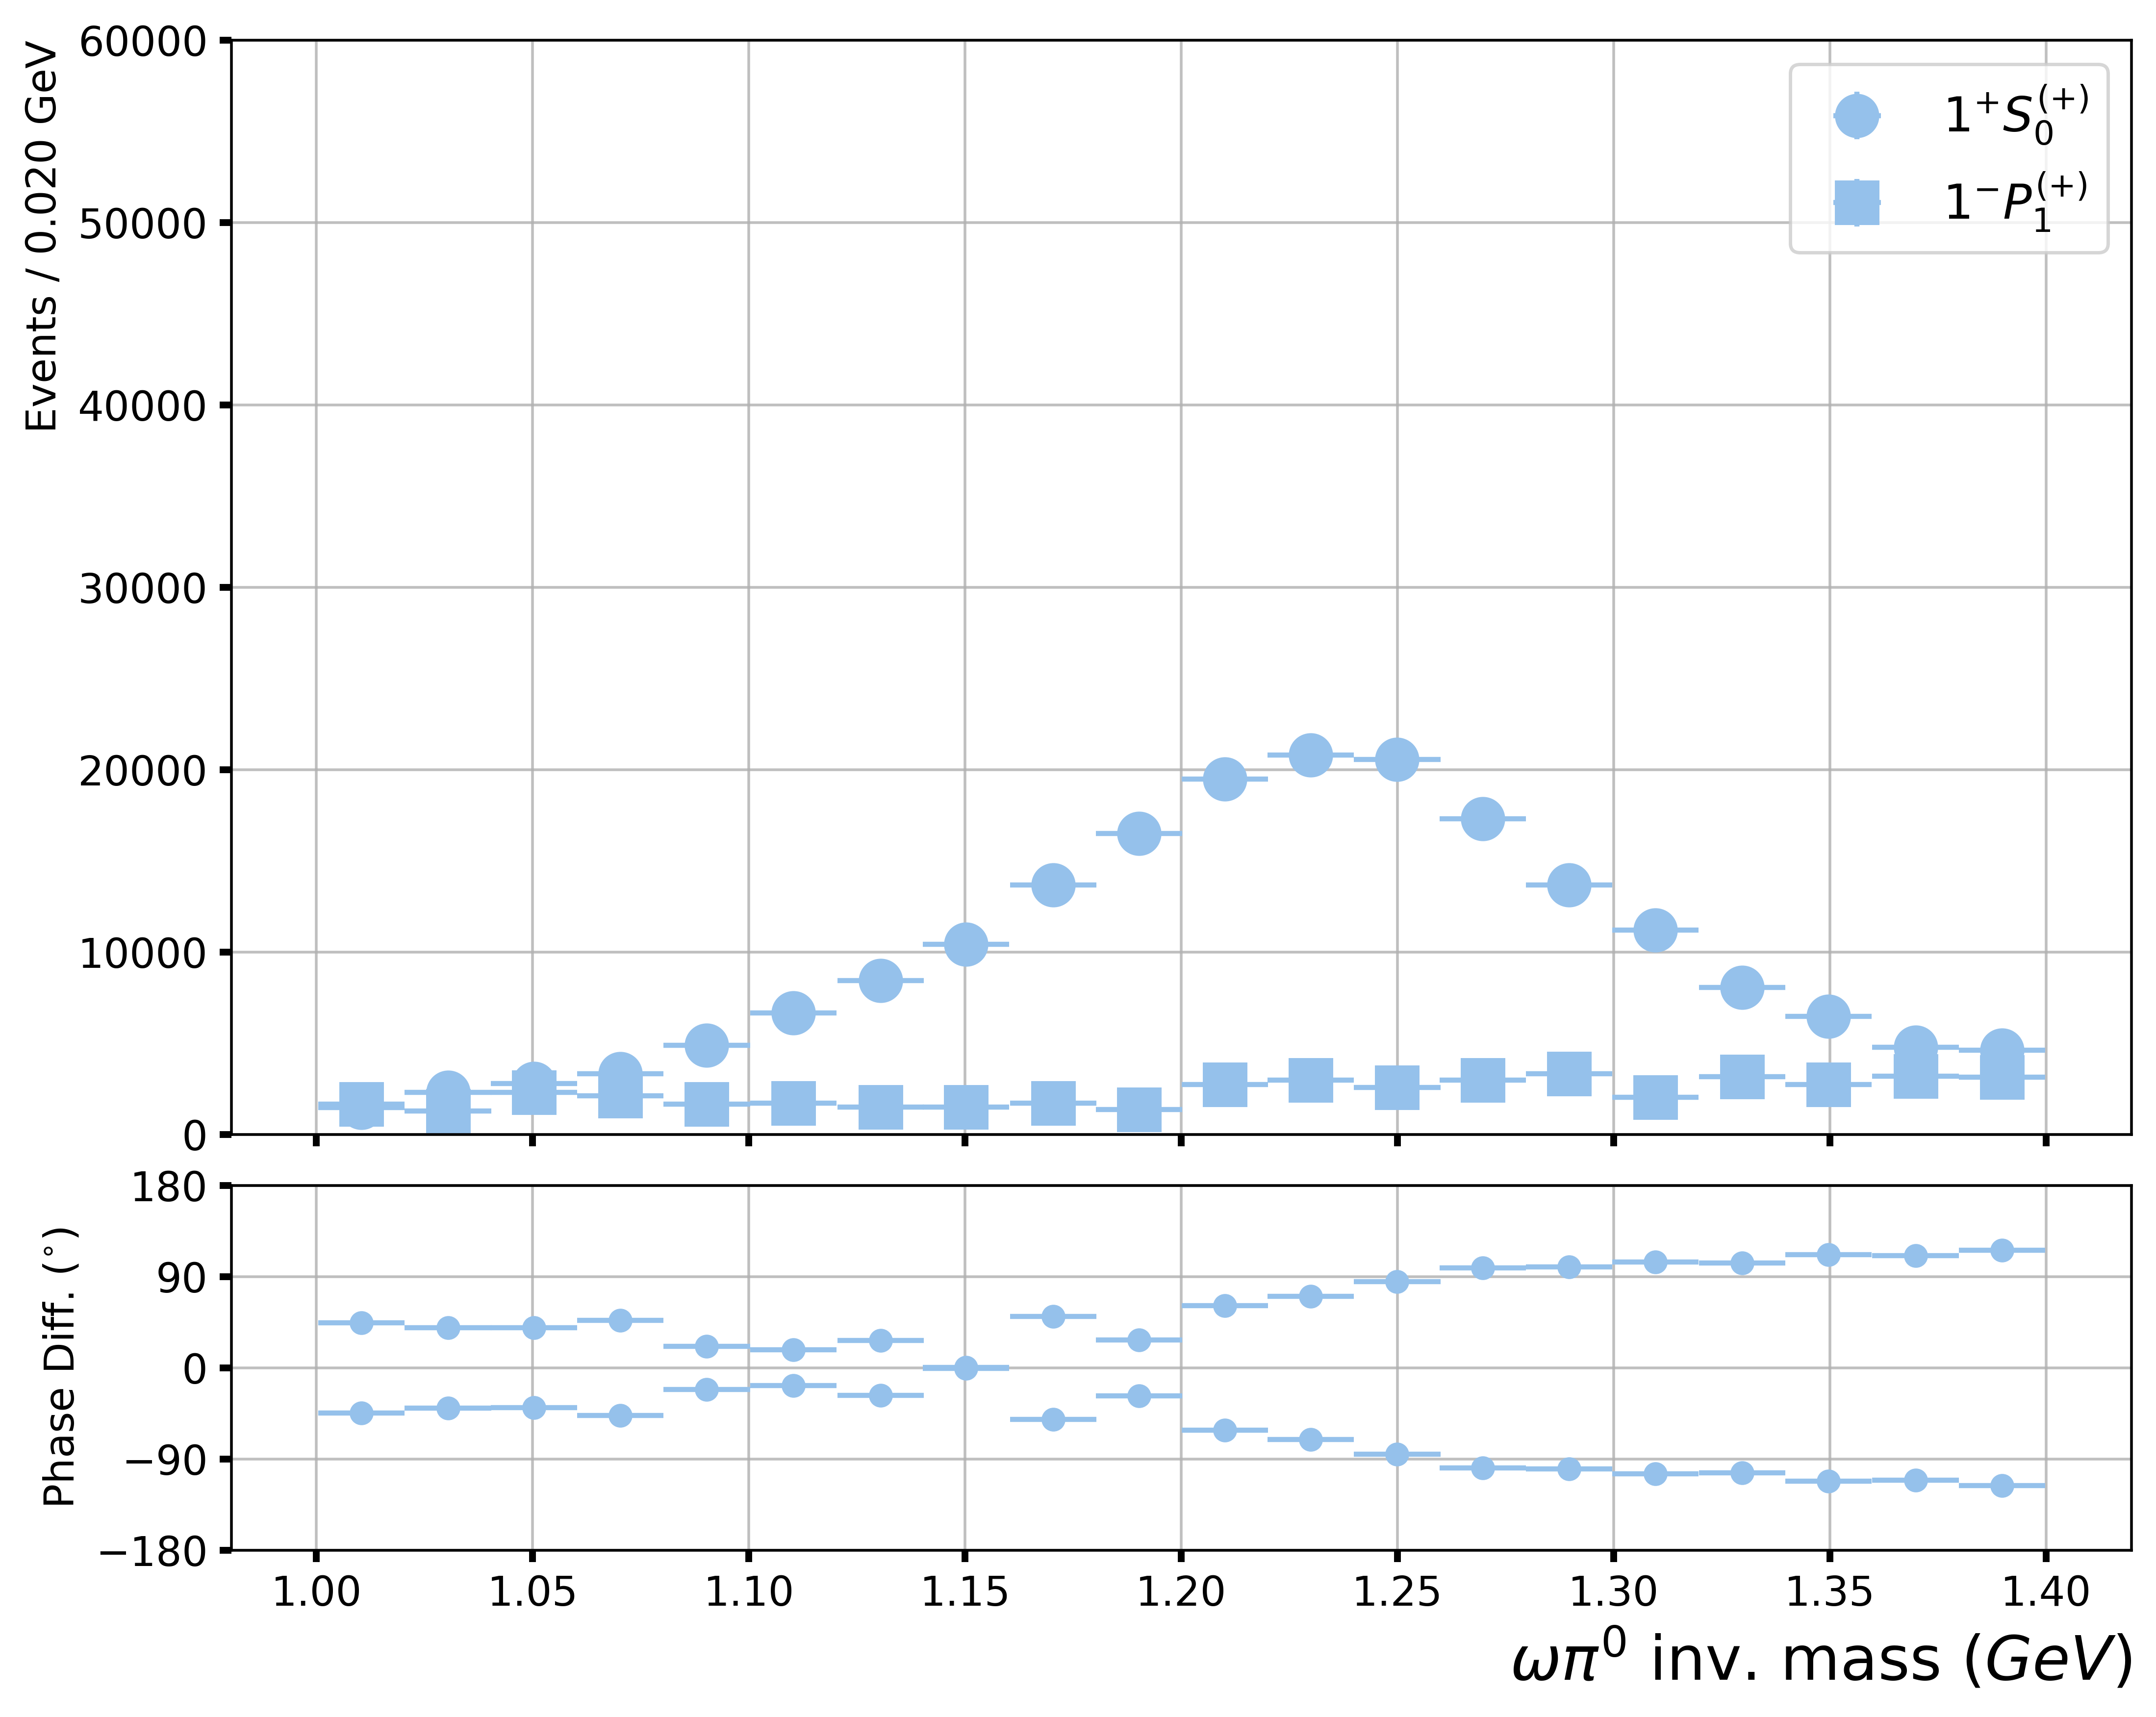

In [5]:
plotter_bin_1.mass_phase("p1p0S", "p1mpP", "#223BB5")
plotter_bin_2.mass_phase("p1p0S", "p1mpP", "#3571AA")
plotter_bin_3.mass_phase("p1p0S", "p1mpP", "#6898CA")
plotter_bin_4.mass_phase("p1p0S", "p1mpP", "#95C1EB")

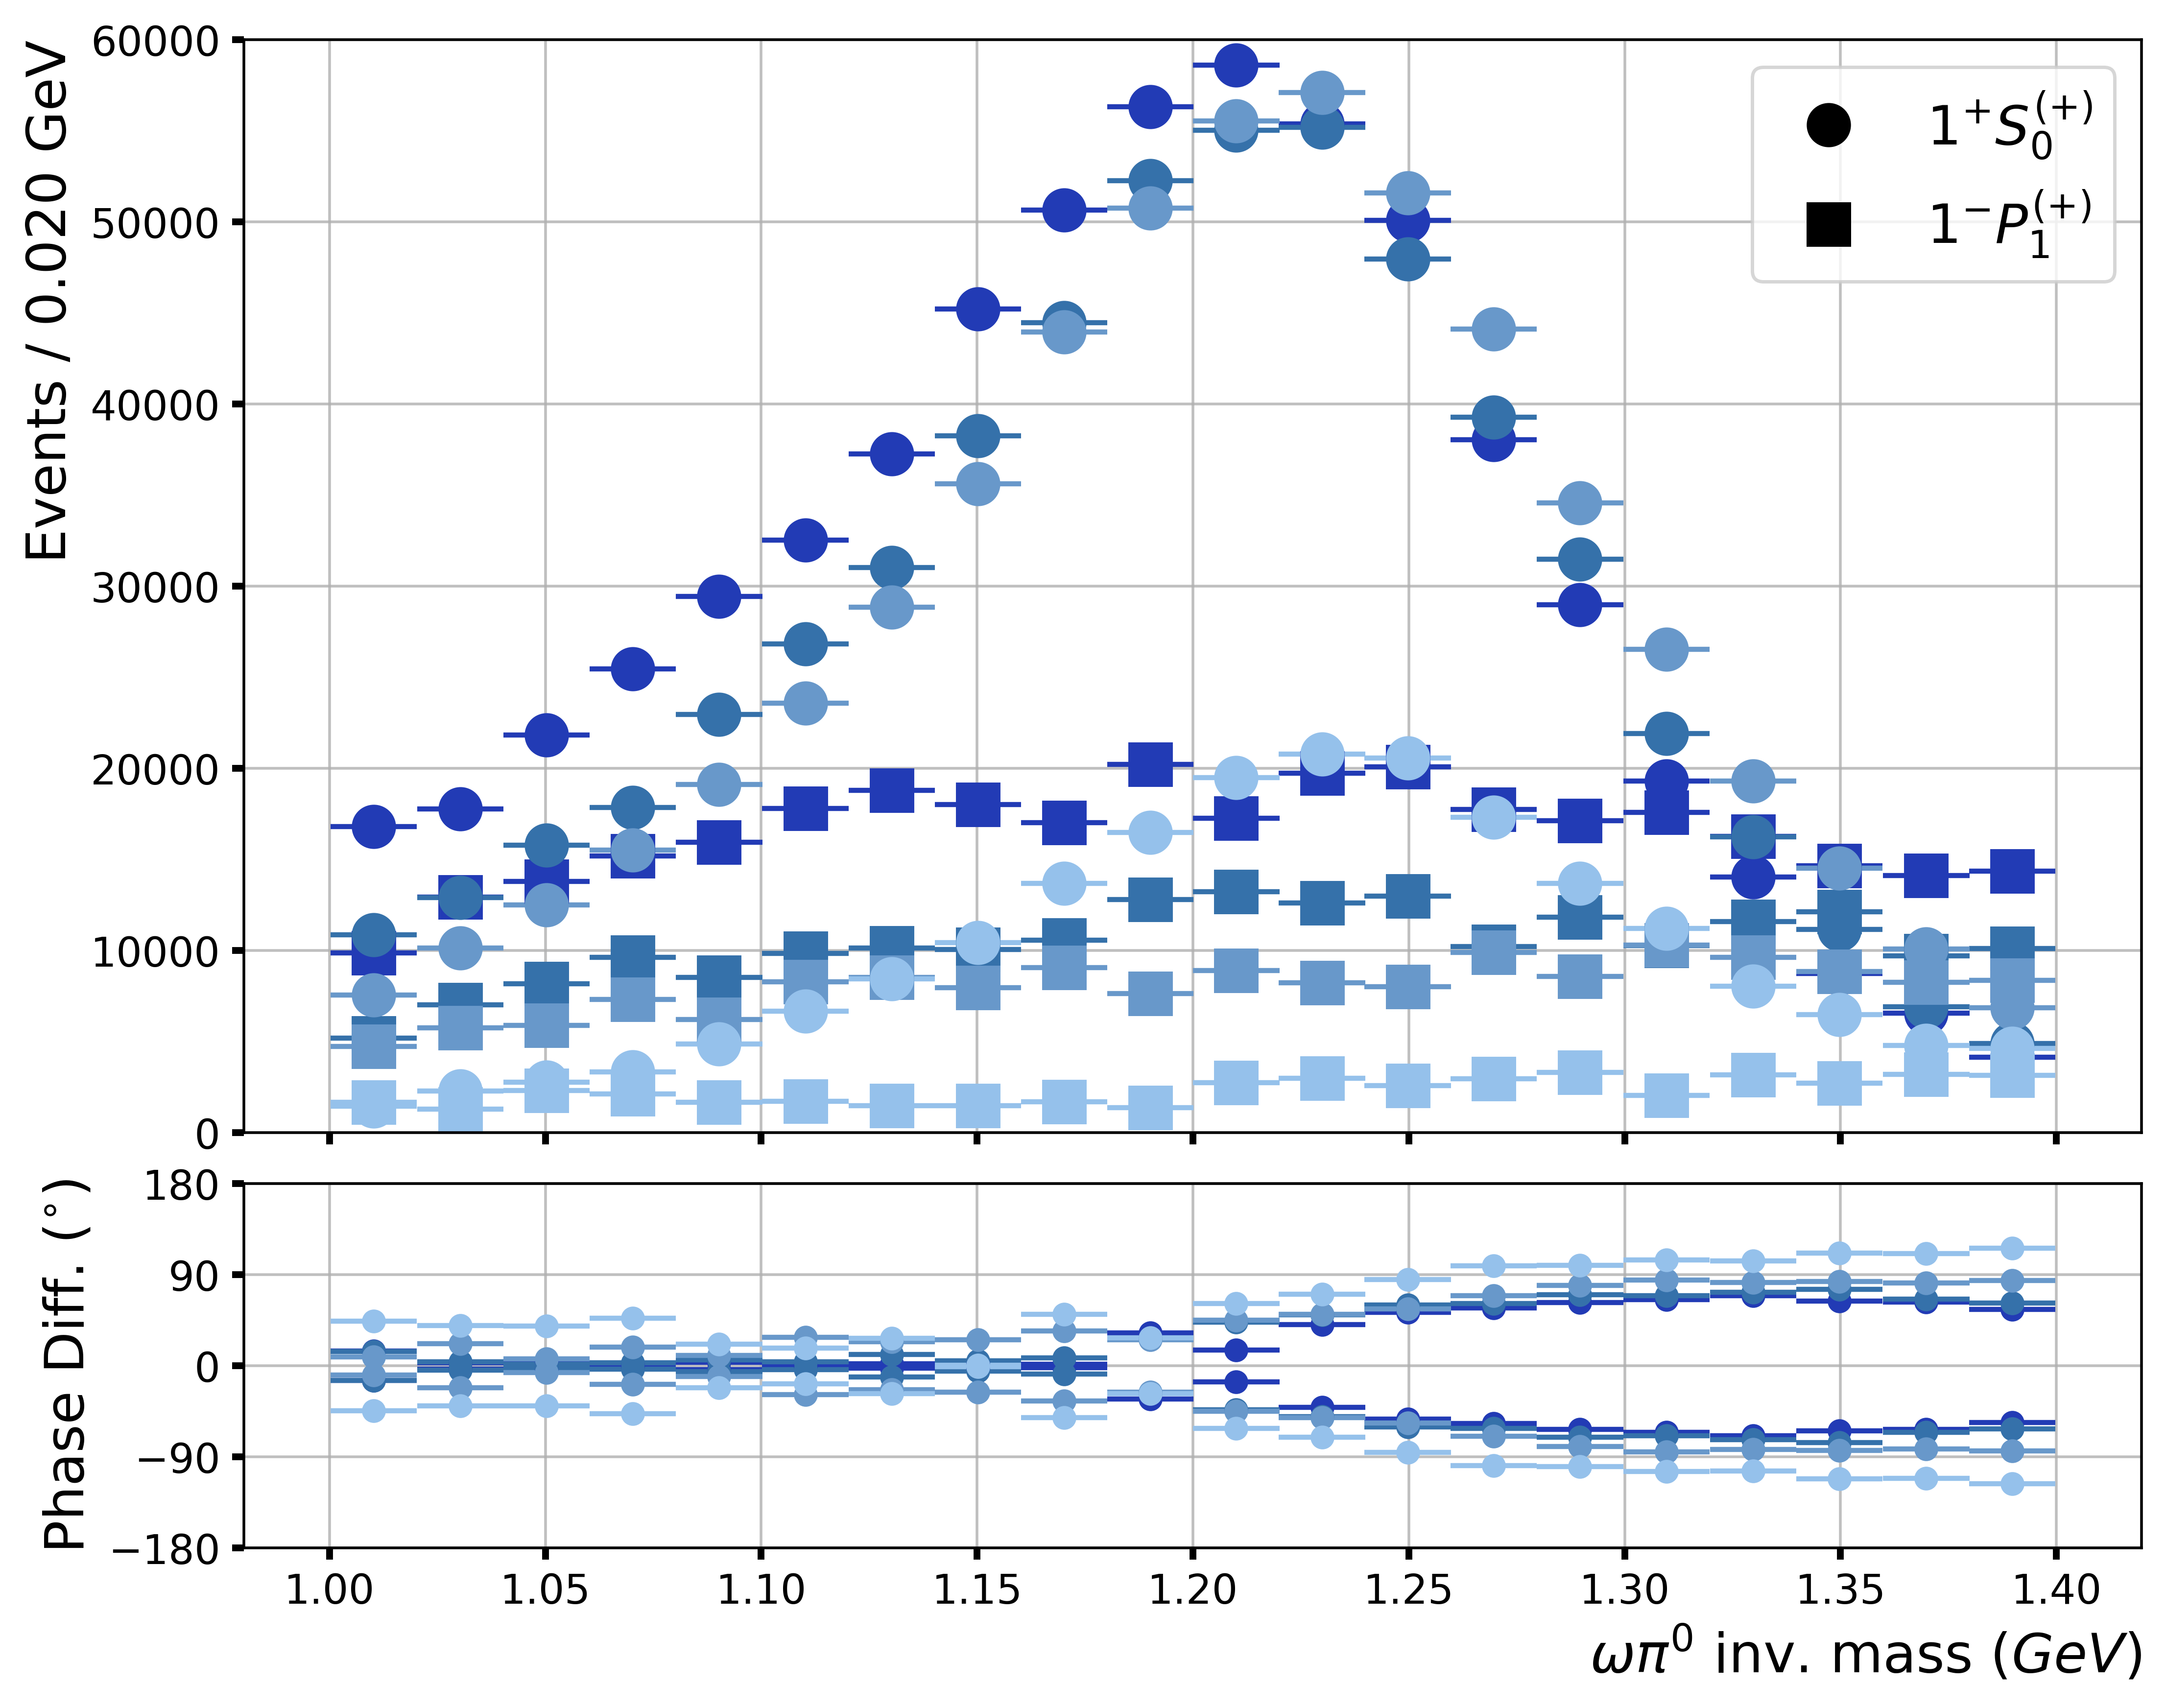

In [15]:
# plot these all together on one plot now
def my_plot(df, axs, color_list):
    amp1, amp2 = "p1p0S", "p1mpP"

    axs[0].errorbar(
        MASS_BINS,
        df[amp1],
        df[f"{amp1}_err"],
        bin_width / 2,
        "o",
        color=color_list[0]        
    )
    axs[0].errorbar(
        MASS_BINS,
        df[amp2],
        df[f"{amp2}_err"],
        bin_width / 2,
        "s",
        color=color_list[1]        
    )

    phase_dif = phase_differences[(amp1, amp2)]
    axs[1].errorbar(
        MASS_BINS,
        df[phase_dif].apply(np.rad2deg),
        df[phase_dif + "_err"].abs().apply(np.rad2deg),
        bin_width / 2,
        linestyle="",
        marker=".",
        color=color_list[2],
    )
    axs[1].errorbar(
        MASS_BINS,
        -df[phase_dif].apply(np.rad2deg),
        df[phase_dif + "_err"].abs().apply(np.rad2deg),
        bin_width / 2,
        linestyle="",
        marker=".",
        color=color_list[2],
    )    

fig, axs = plt.subplots(2, 1, sharex=True, 
                        gridspec_kw={"wspace": 0.0, "hspace": 0.07}, height_ratios=[3, 1],
)
t_cuts = ["0.1-0.2", "0.2-0.3", "0.3-0.5", "0.5-0.9"]
my_plot(df[df["t"]==t_cuts[0]], axs, ["#223BB5"]*3)
my_plot(df[df["t"]==t_cuts[1]], axs, ["#3571AA"]*3)
my_plot(df[df["t"]==t_cuts[2]], axs, ["#6898CA"]*3)
my_plot(df[df["t"]==t_cuts[3]], axs, ["#95C1EB"]*3)

black_marker = axs[0].plot([], [], color="black", marker="o", linestyle="", label=pwa_tools.convert_amp_name("p1p0S"))
black_marker = axs[0].plot([], [], color="black", marker="s", linestyle="", label=pwa_tools.convert_amp_name("p1mpP"))


# cosmetics
for ax in axs.reshape(-1):
    ax.grid(True, alpha=0.8)

axs[0].set_ylim(bottom=0.0)
axs[0].set_ylabel(f"Events / {bin_width:.3f} GeV", loc="top")

axs[1].set_yticks(np.linspace(-180, 180, 5))  # force to be in pi/2 intervals
axs[1].set_ylim([-180, 180])
axs[1].set_ylabel(r"Phase Diff. ($^{\circ}$)", loc="center")
axs[1].set_xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")

axs[0].legend(loc="upper right")
axs[0].set_ylim(top=60000)

plt.show()


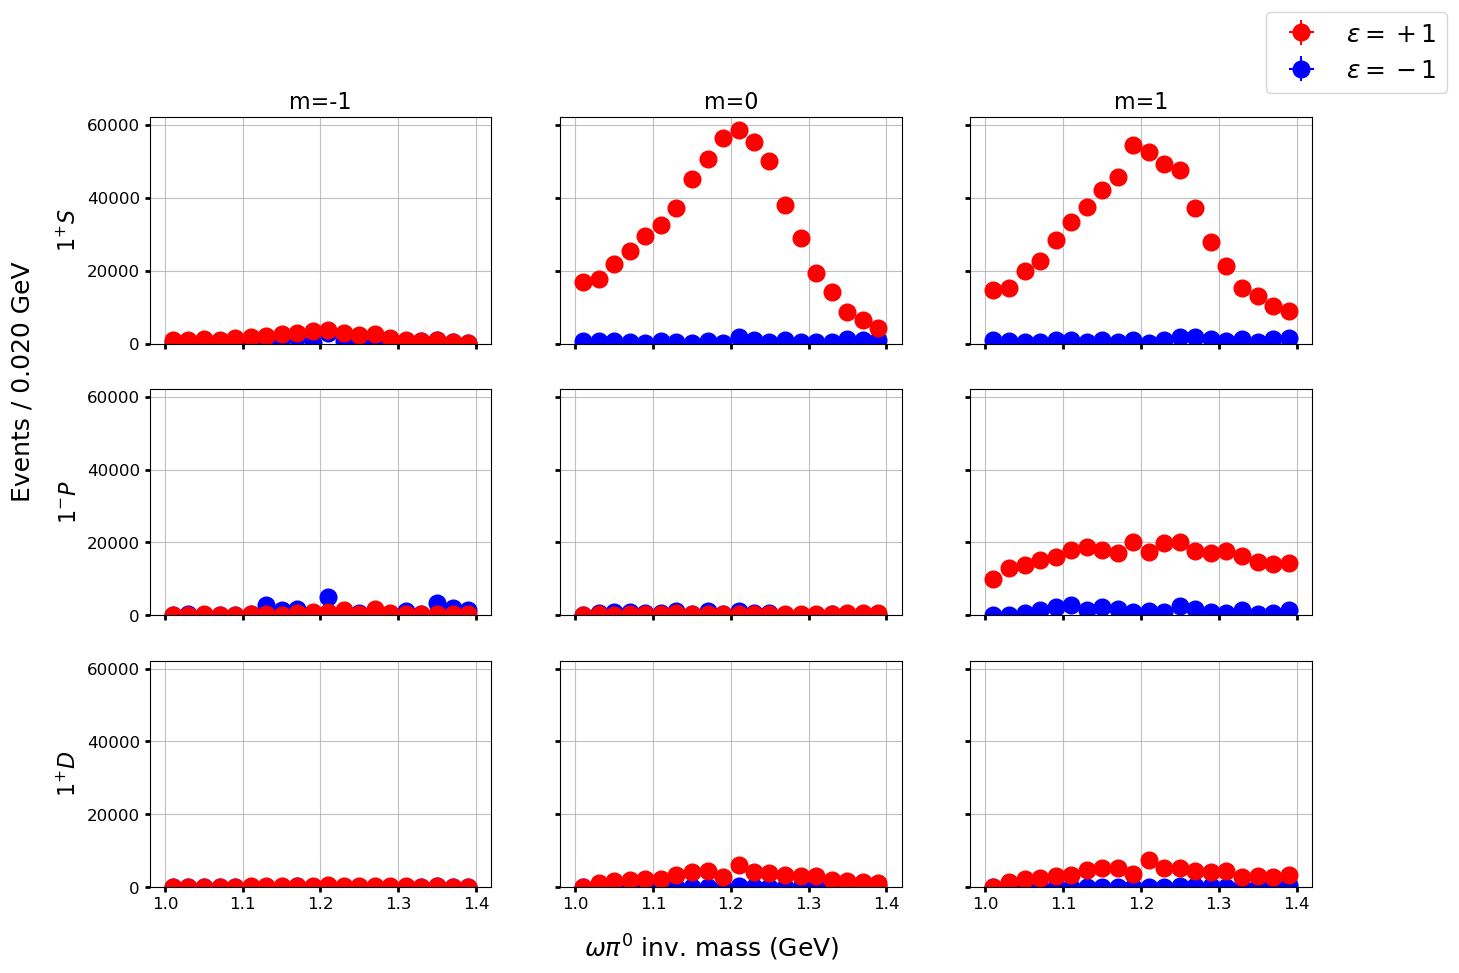

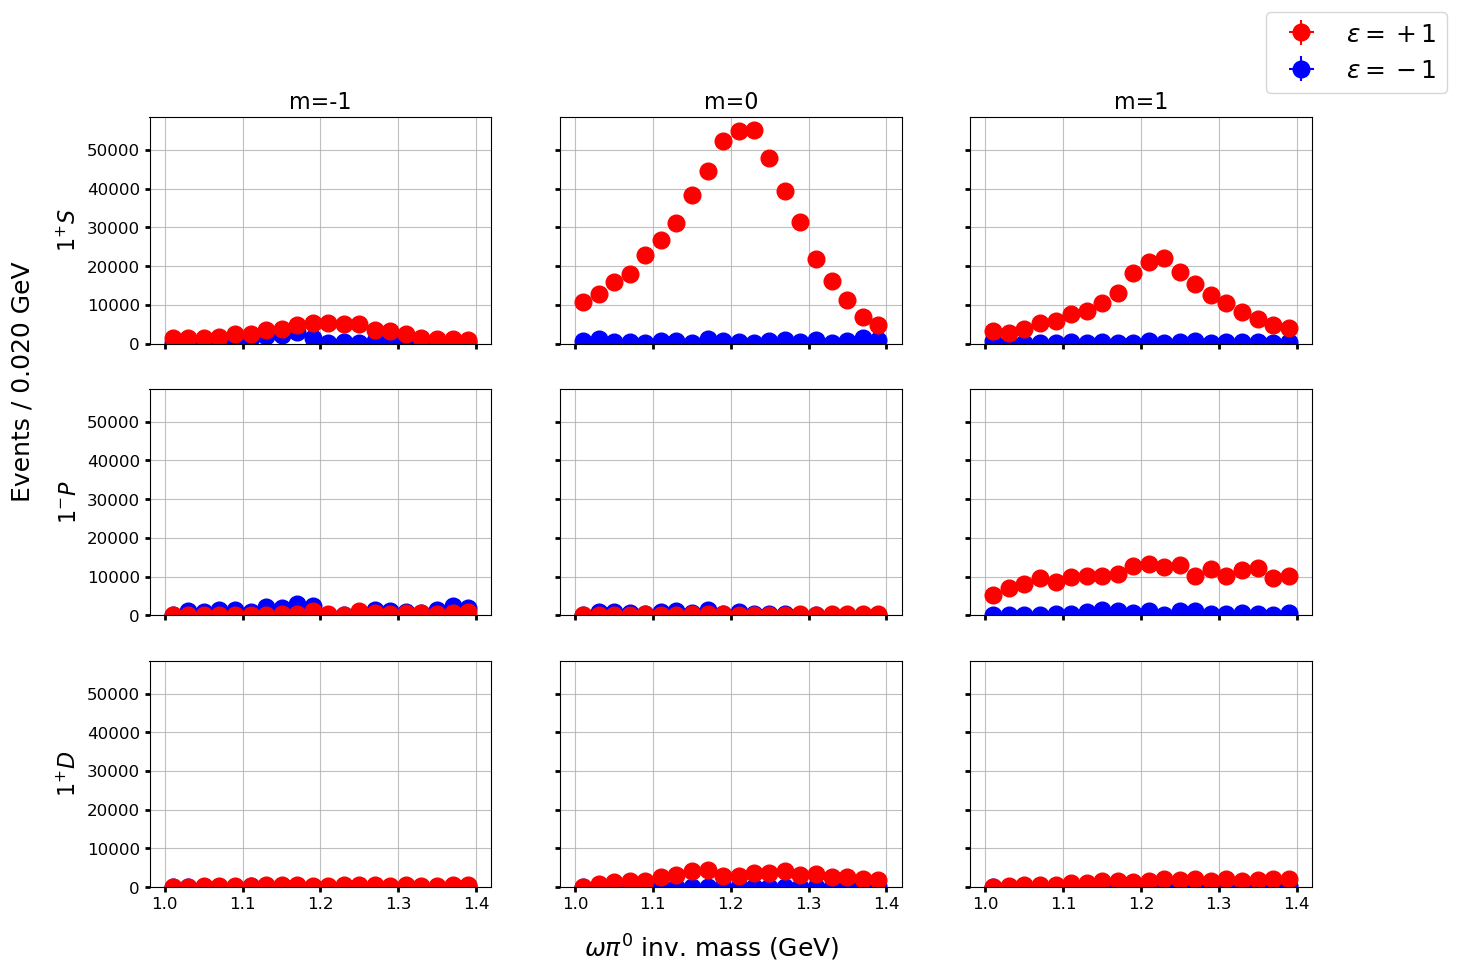

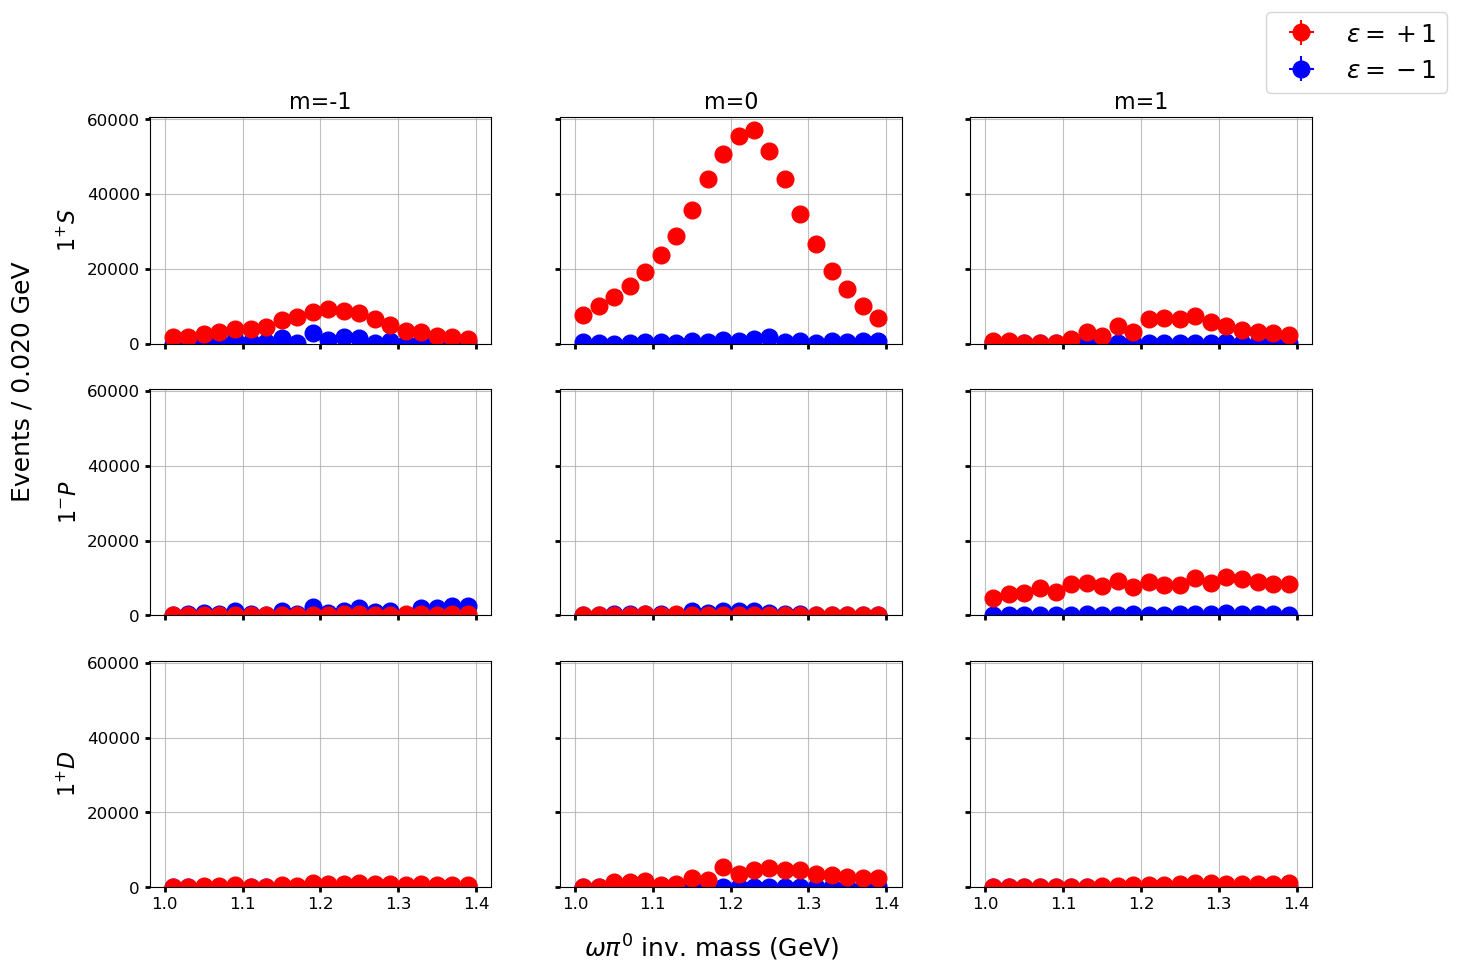

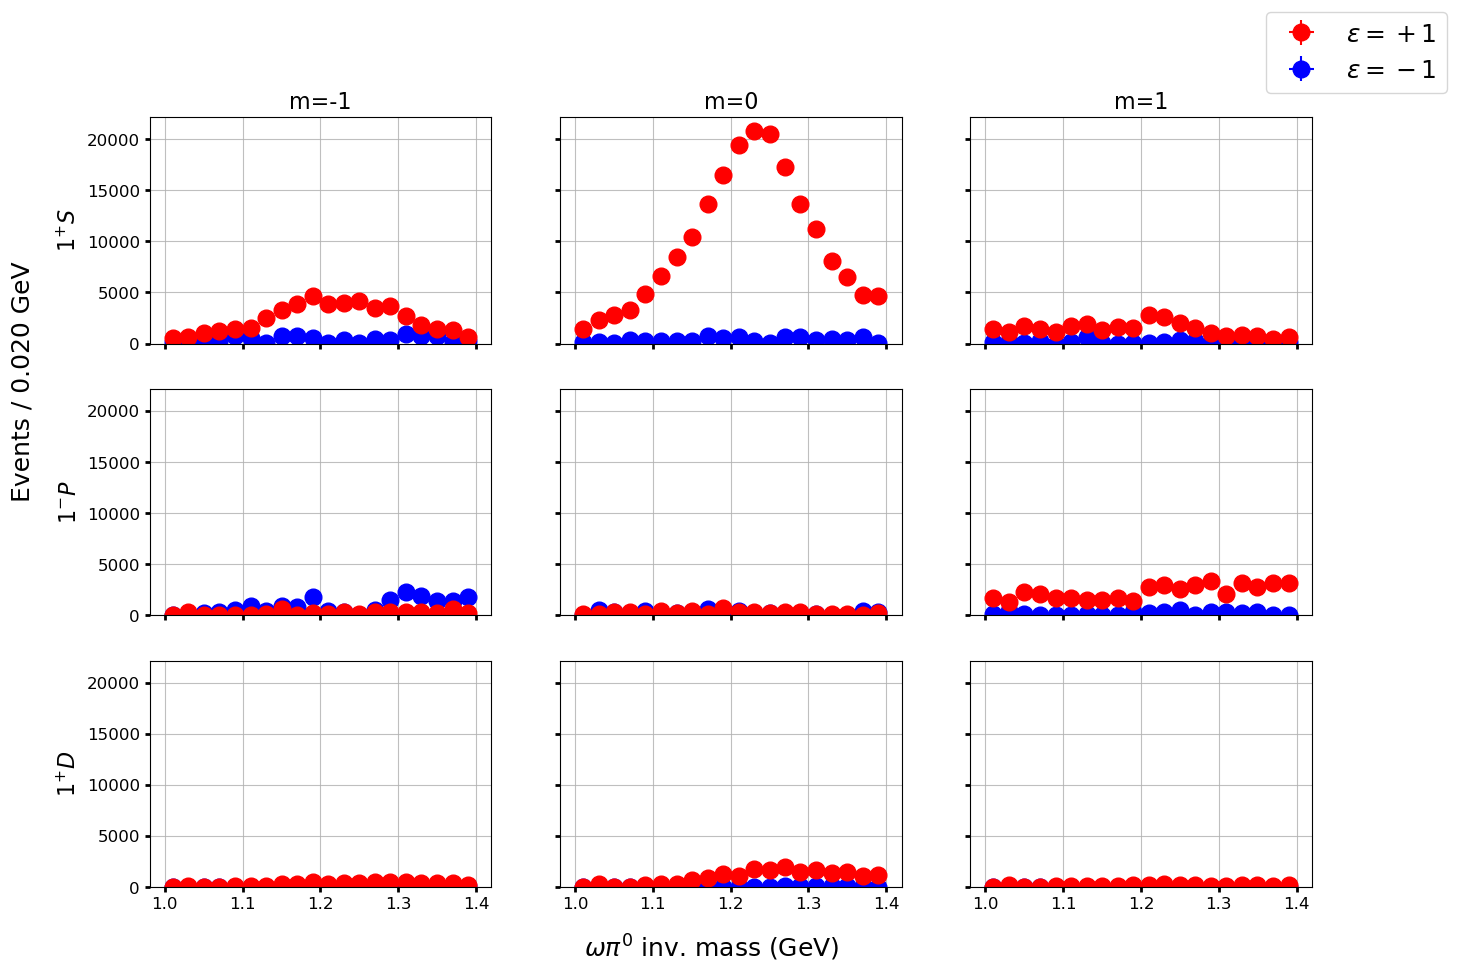

In [7]:
plotter_bin_1.intensities()
plotter_bin_2.intensities()
plotter_bin_3.intensities()
plotter_bin_4.intensities()

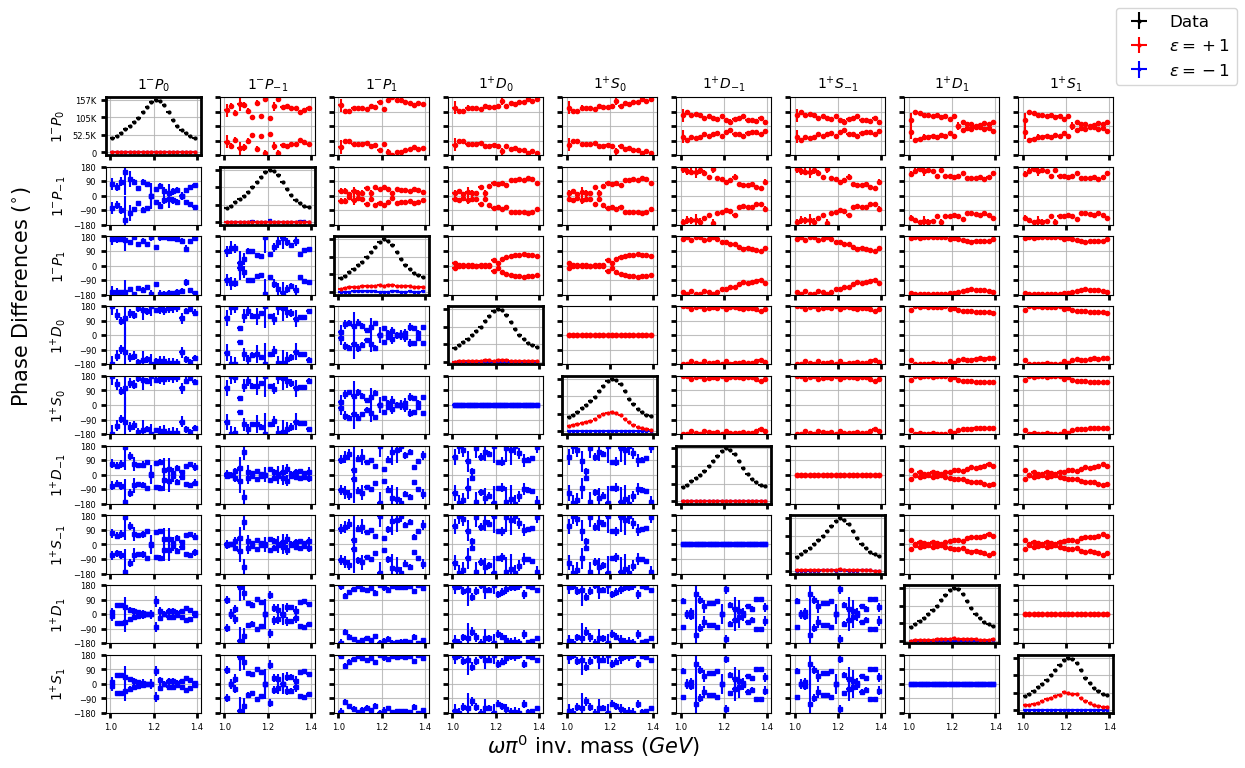

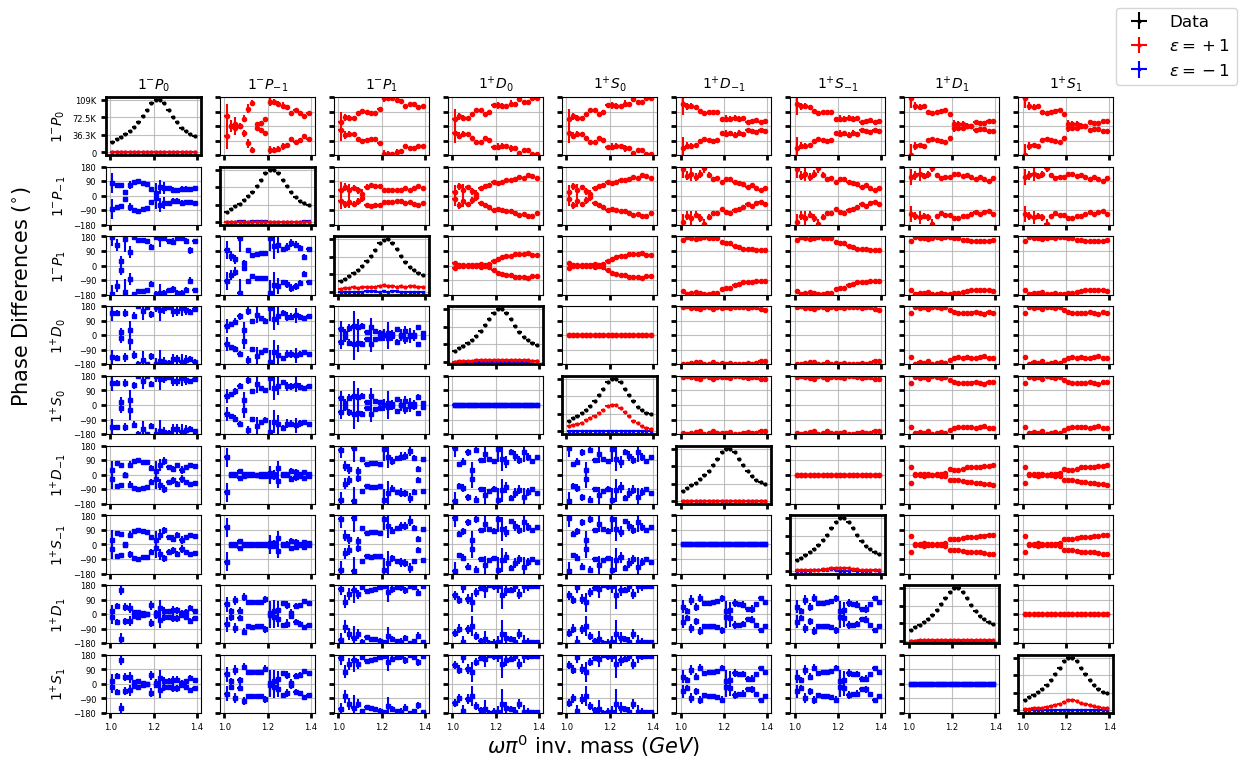

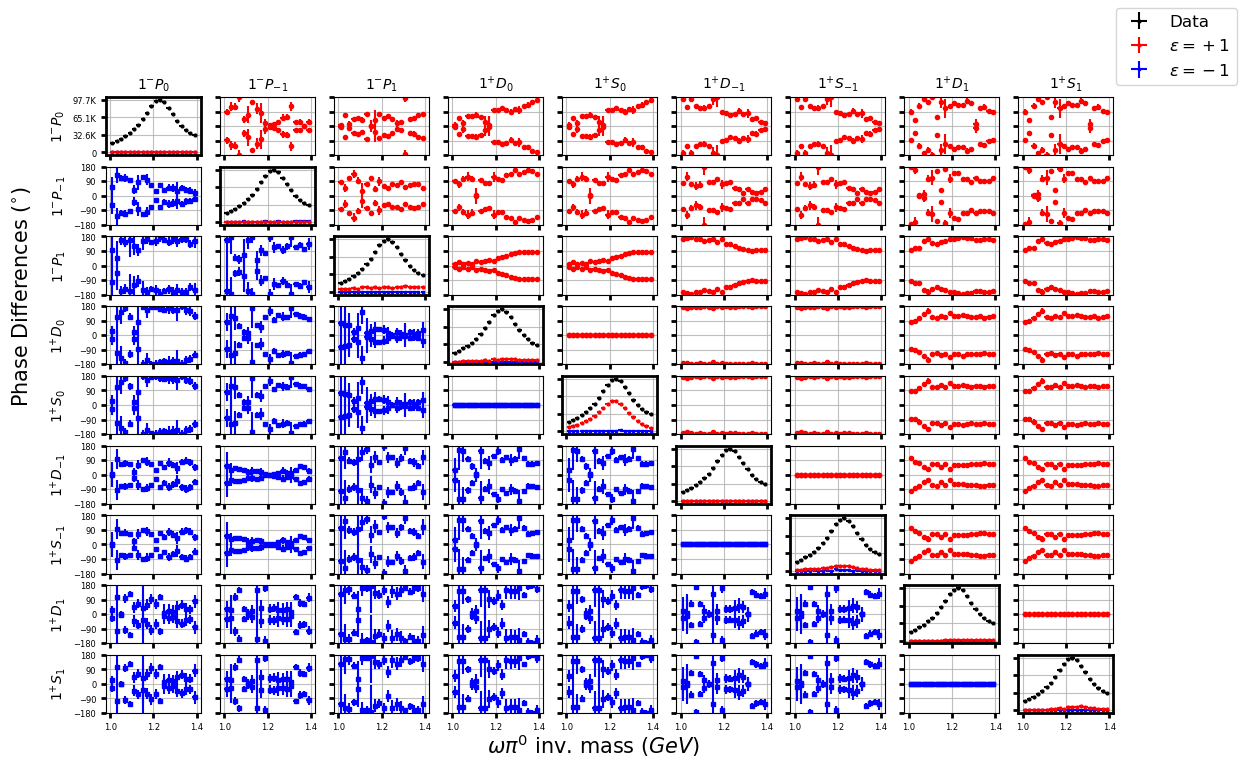

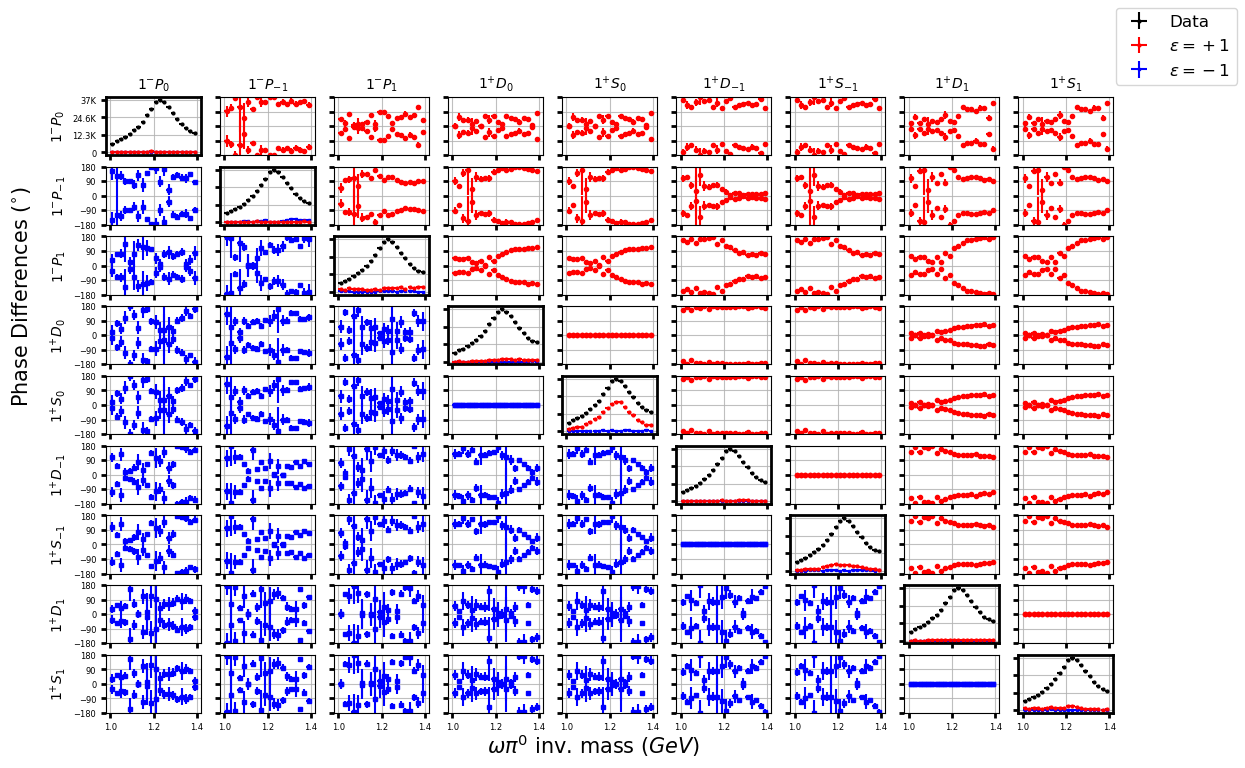

In [8]:
plotter_bin_1.matrix()
plotter_bin_2.matrix()
plotter_bin_3.matrix()
plotter_bin_4.matrix()

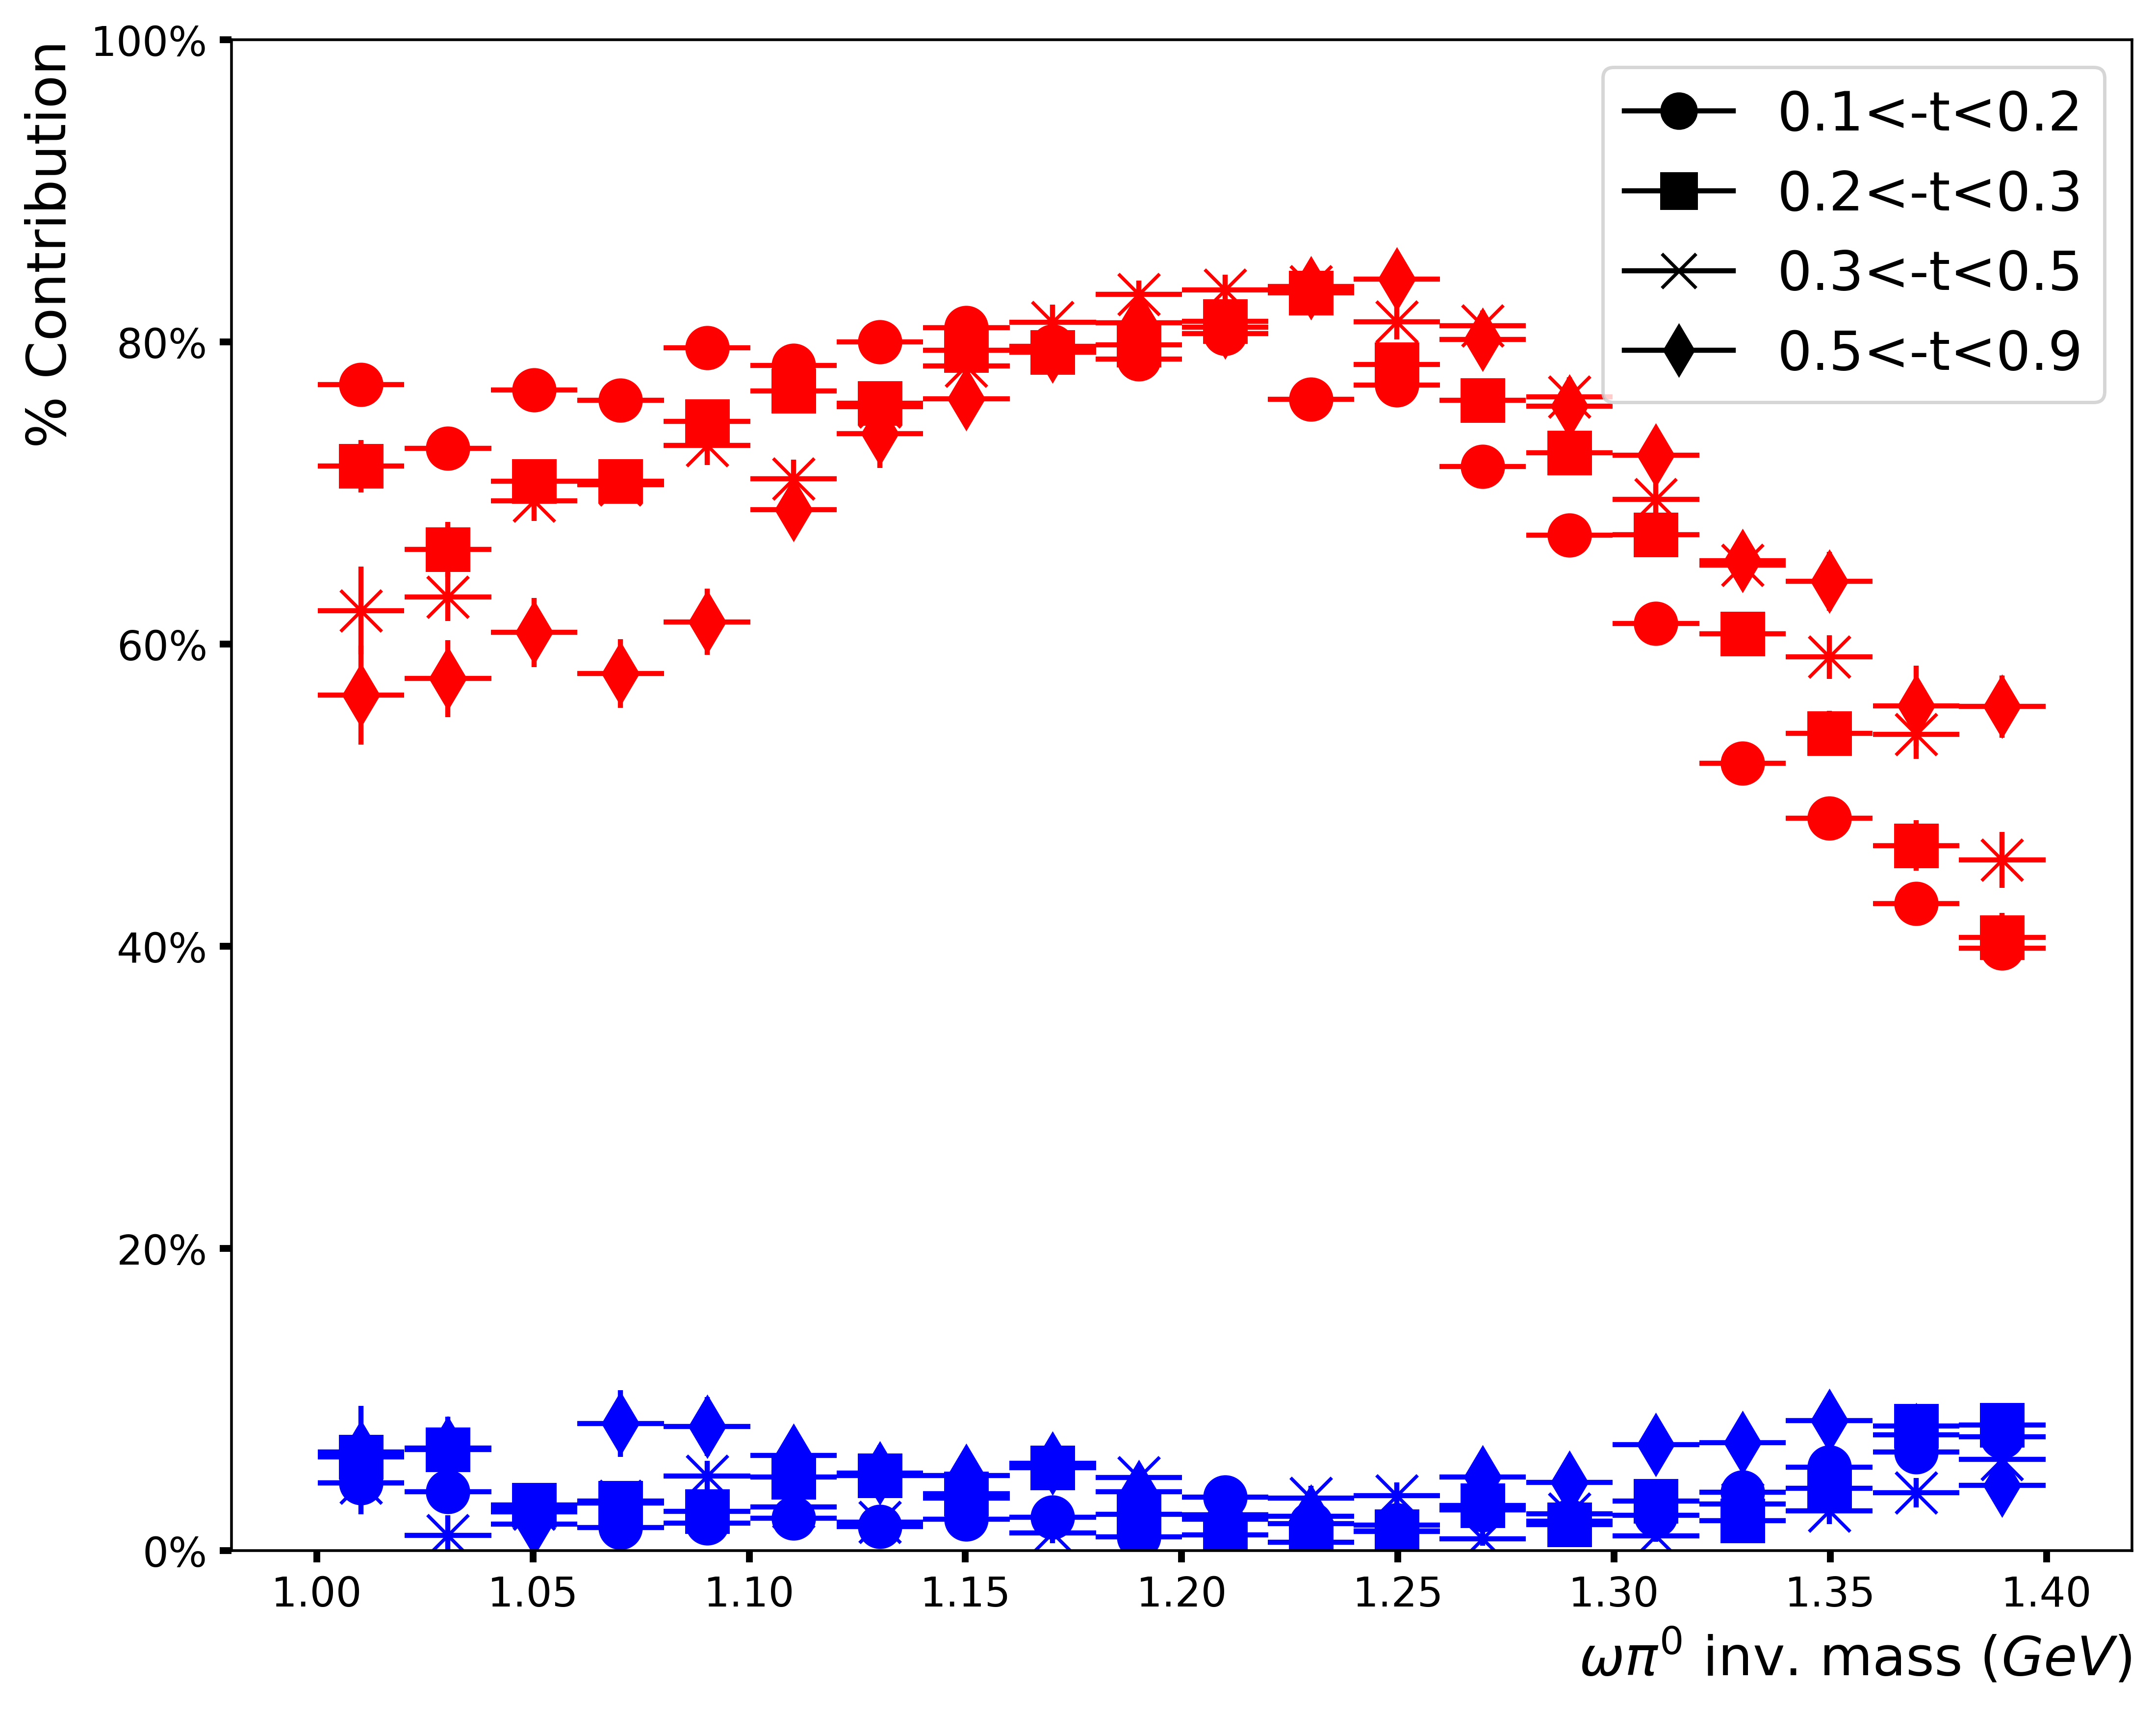

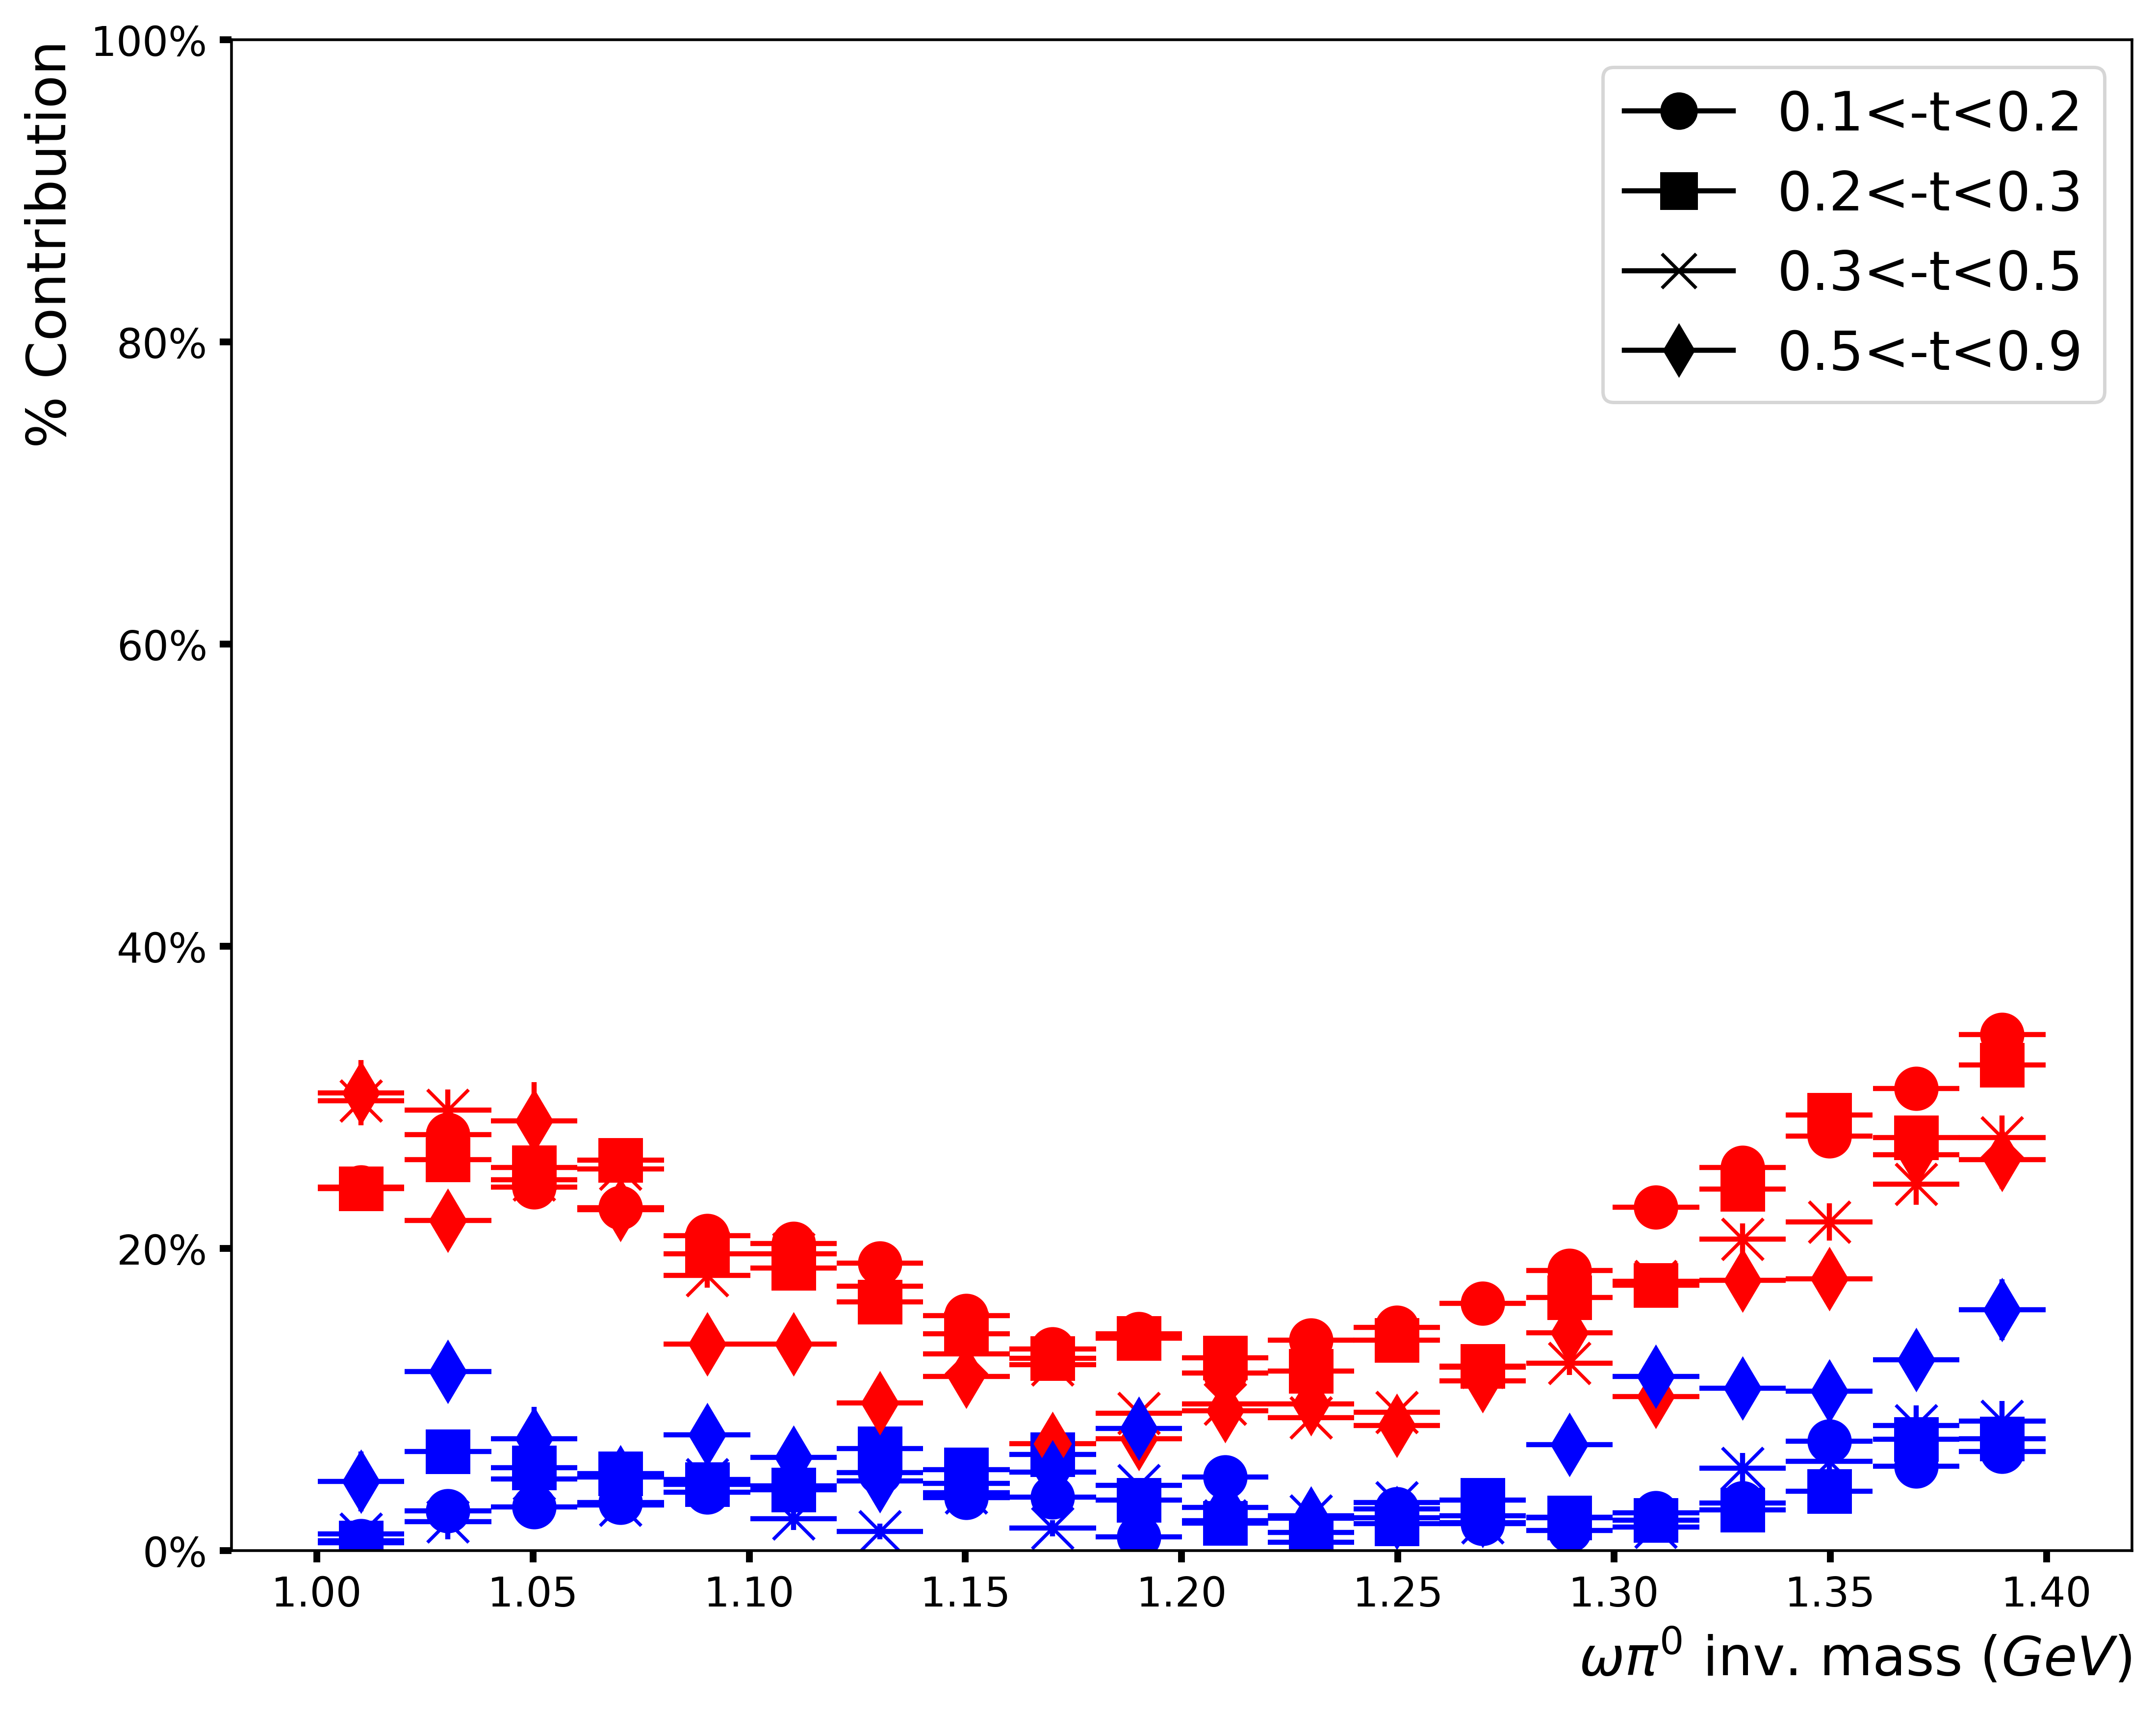

In [5]:
# Instead of plotting the unstable cross section, we might try and make some small claim about the reflectivity dominance by simply plotting the
# fit fraction as a function of mass, and in the 4 t bins
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines

t_cuts = ["0.1-0.2", "0.2-0.3", "0.3-0.5", "0.5-0.9"]
marker_list = ["o", "s", "x", "d"]
handles=[]

# Plot 1p
for i, t_cut in enumerate(t_cuts):
    total = df[df["t"]==t_cut]["detected_events"]
    total_err = df[df["t"]==t_cut]["detected_events_err"]   
    temp_df = df[df["t"]==t_cut]
    plt.errorbar(
        MASS_BINS,  temp_df["p1p"]/total, 
        (temp_df["p1p"]/total) * np.sqrt(np.square(temp_df["p1p_err"]/temp_df["p1p"]) + np.square(total_err/total)), 
        bin_width/2, 
        color="red", marker=marker_list[i], linestyle=""
    )
    plt.errorbar(
        MASS_BINS,  temp_df["m1p"]/total, 
        (temp_df["m1p"]/total) * np.sqrt(np.square(temp_df["m1p_err"]/temp_df["m1p"]) + np.square(total_err/total)),  
        bin_width/2, 
        color="blue", marker=marker_list[i], linestyle="")    
    
    # create blank line to have a single legend entry for each marker style
    black_marker = mlines.Line2D([], [], color='black', marker=marker_list[i], markersize=10, 
                                 label=fr"{t_cut[0:3]}<-t<{t_cut[4:]}")
    handles.append(black_marker)

plt.ylim([0,1])
plt.legend(handles=handles)
plt.xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")
plt.ylabel(r"% Contribution", loc="top")

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  

plt.show()

# repeat in 1m
handles=[]
for i, t_cut in enumerate(t_cuts):
    total = df[df["t"]==t_cut]["detected_events"]
    total_err = df[df["t"]==t_cut]["detected_events_err"]   
    temp_df = df[df["t"]==t_cut]
    plt.errorbar(
        MASS_BINS,  temp_df["p1m"]/total, 
        (temp_df["p1m"]/total) * np.sqrt(np.square(temp_df["p1m_err"]/temp_df["p1m"]) + np.square(total_err/total)), 
        bin_width/2, 
        color="red", marker=marker_list[i], linestyle=""
    )
    plt.errorbar(
        MASS_BINS,  temp_df["m1m"]/total, 
        (temp_df["m1m"]/total) * np.sqrt(np.square(temp_df["m1m_err"]/temp_df["m1m"]) + np.square(total_err/total)),  
        bin_width/2, 
        color="blue", marker=marker_list[i], linestyle="")    
    
    # create blank line to have a single legend entry for each marker style
    black_marker = mlines.Line2D([], [], color='black', marker=marker_list[i], markersize=10, 
                                 label=fr"{t_cut[0:3]}<-t<{t_cut[4:]}")
    handles.append(black_marker)

plt.ylim([0,1])
plt.legend(handles=handles)
plt.xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")
plt.ylabel(r"% Contribution", loc="top")

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  

plt.show()

# OTHER PLOTS
stuff just to quickly make as backup

Try fitting the S1+ distribution with a gaussian

Slope: 7999.999999999999
y-intercept: 6134.659367754203
Scale: 13539.111878193882
Mean: 1.2200000000000002
Width: 0.10000000000000002


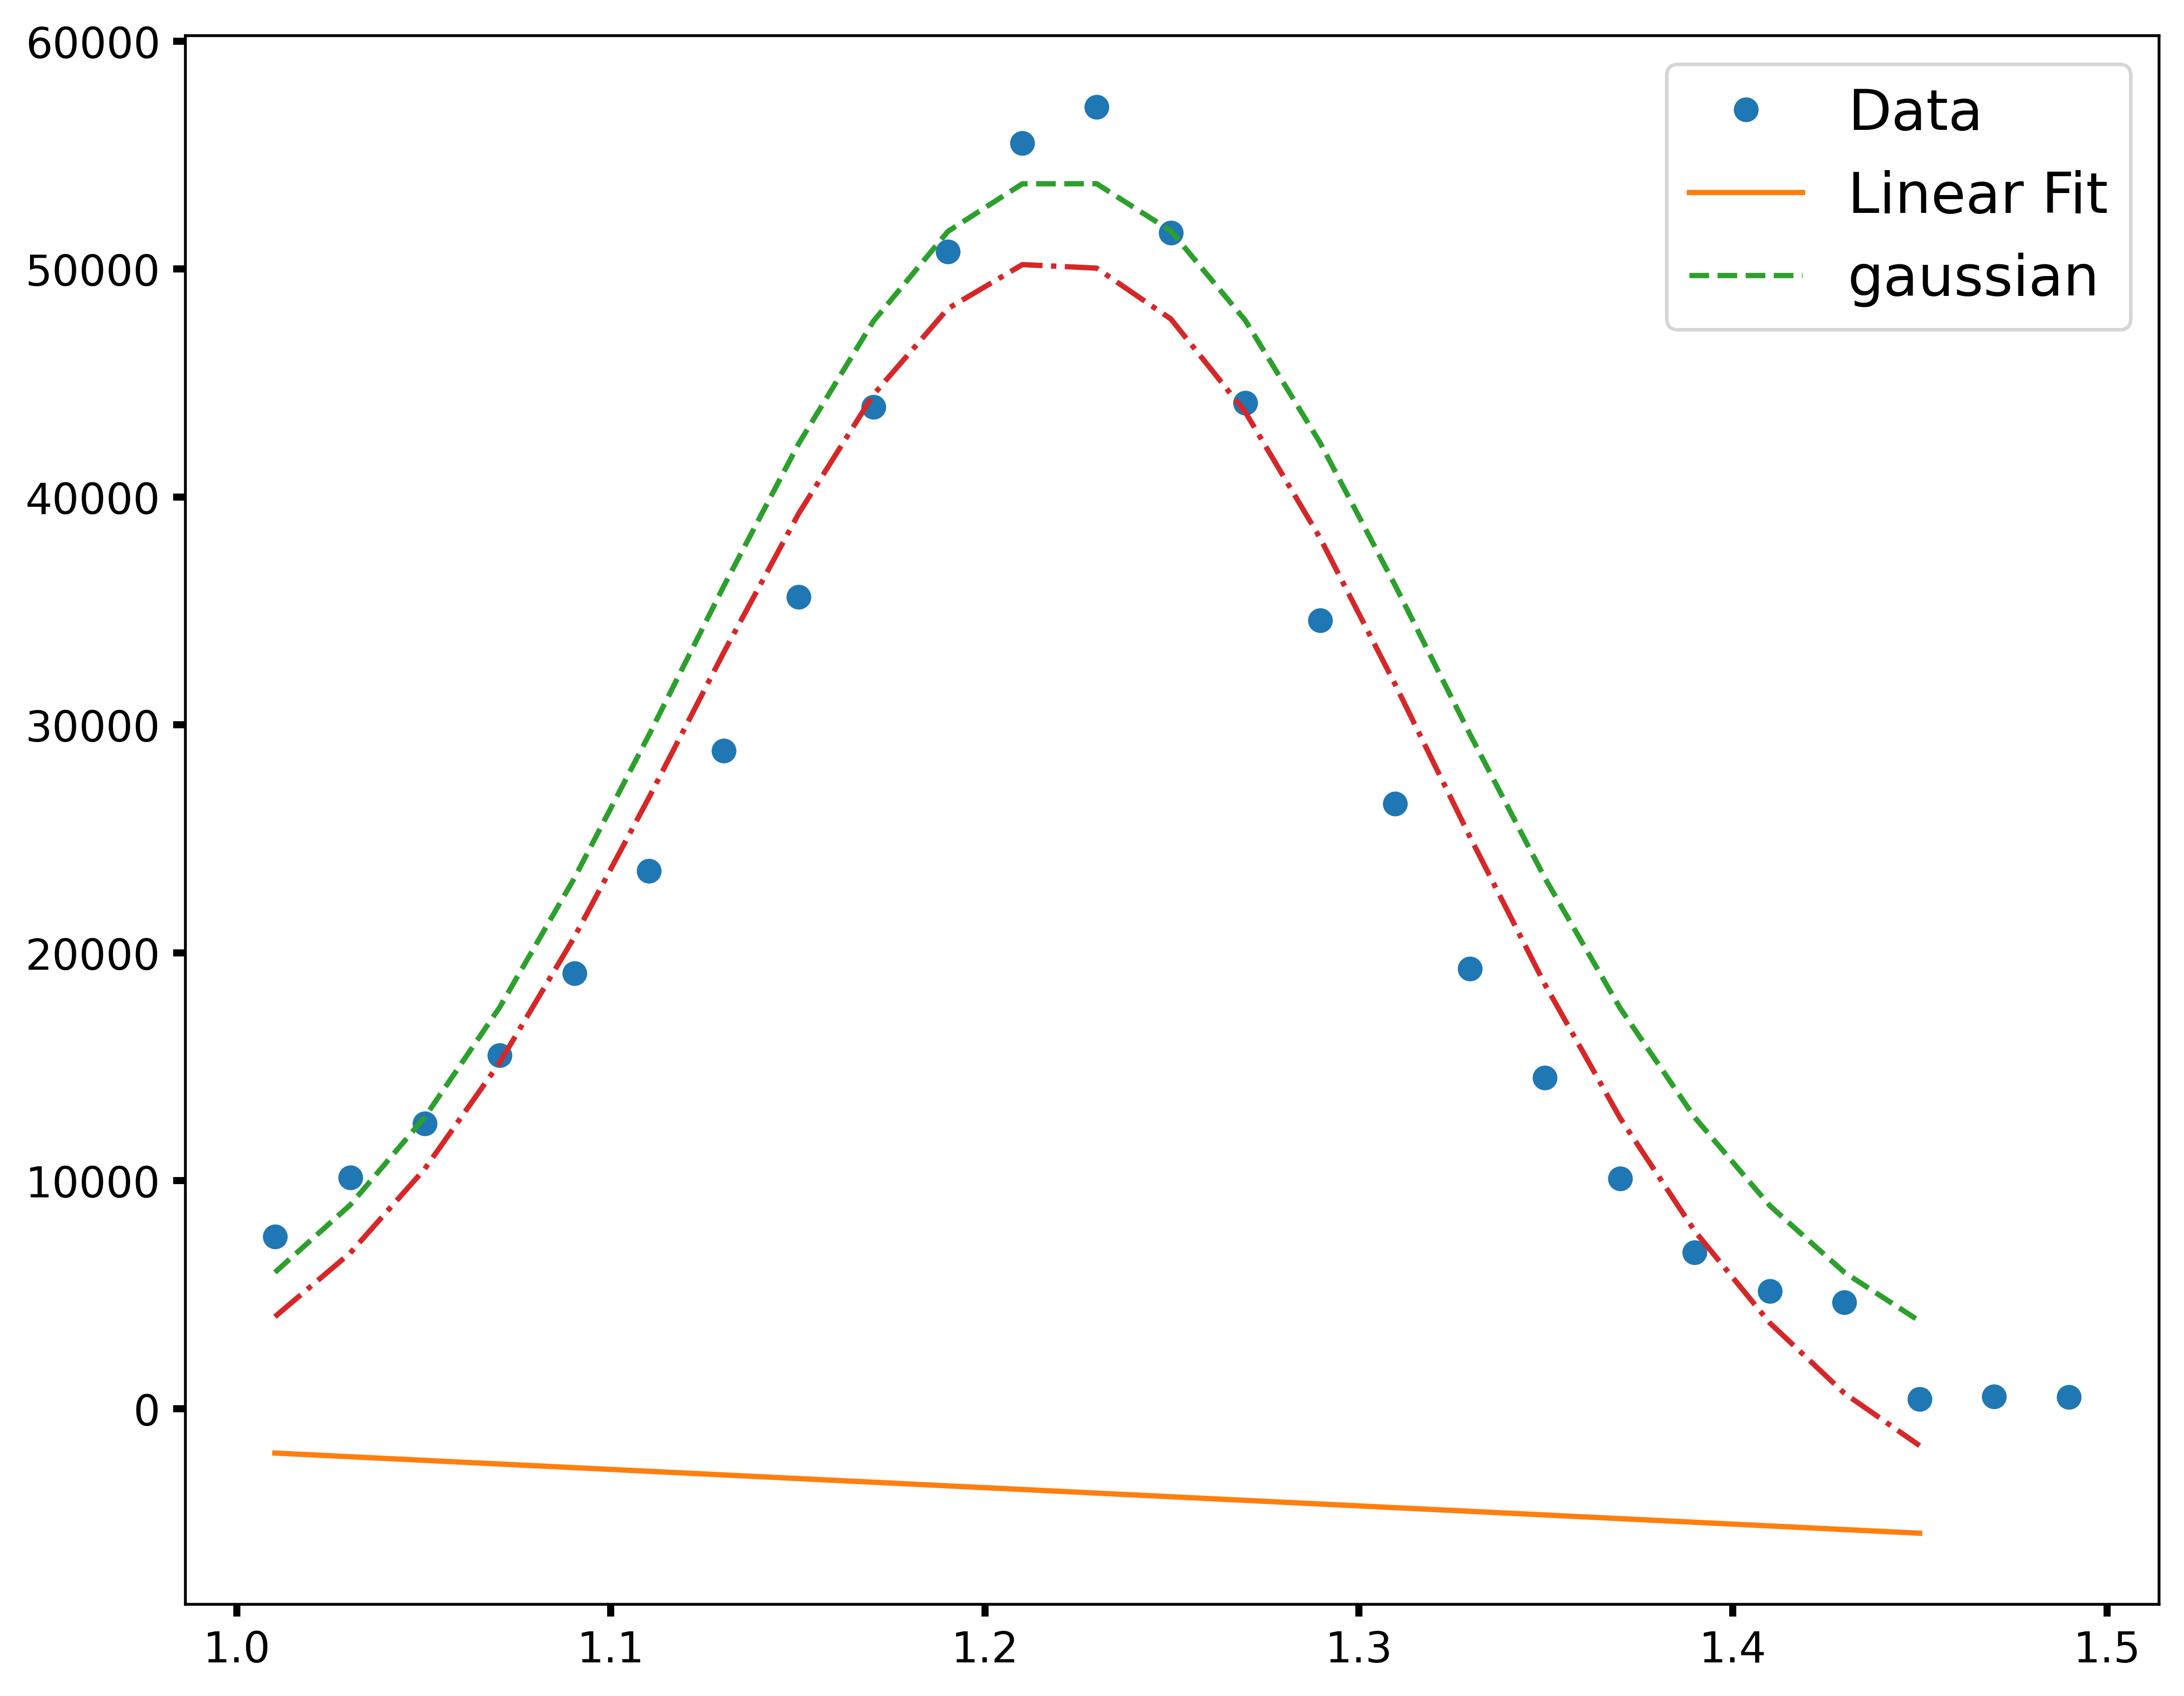

In [63]:
from scipy.optimize import curve_fit
def lin_gaussian(x, a, b, scale, mean, sigma):
    return -a*x+ b + (scale / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x-mean)**2) / (2 * sigma**2))

def gaussian(x, scale, mean, sigma):
    return (scale / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x-mean)**2) / (2 * sigma**2))
def linear(x, a, b):
    return -a*x + b

low_bin_index = [i for i,x in enumerate(MASS_BINS) if x>1.0][0]
high_bin_index = [i for i,x in enumerate(MASS_BINS) if x<1.45][-1]

filtered_mass = MASS_BINS[low_bin_index:high_bin_index+1]

popt, pcov = curve_fit(lin_gaussian, filtered_mass, df[df["t"]=="0.3-0.5"]["p1p0S"][low_bin_index:high_bin_index+1],
                        bounds=((0,5000,0,1.22,0.1),(8000,np.inf,np.inf,1.25,0.5)), p0=(1000, 5000, 40000, 1.235, 0.142))
print(f"Slope: {popt[0]}\ny-intercept: {popt[1]}\nScale: {popt[2]}\nMean: {popt[3]}\nWidth: {popt[4]}")
y_gauss = gaussian(filtered_mass, popt[2], popt[3], popt[4])
y_lin = linear(filtered_mass, popt[0], popt[1])

# popt, pcov = curve_fit(gaussian, filtered_mass, df[df["t"]=="0.3-0.5"]["p1p0S"][low_bin_index:high_bin_index+1], p0=(30000, 1.235, 0.142))
# y_gauss = gaussian(filtered_mass, popt[0], popt[1], popt[2])
# print(f"Scale: {popt[0]}\nMean: {popt[1]}\nWidth: {popt[2]}")

plt.plot(MASS_BINS, df[df["t"]=="0.3-0.5"]["p1p0S"], label="Data", linestyle="", marker="o")
plt.plot(filtered_mass, y_lin, label="Linear Fit", linestyle="-")
plt.plot(filtered_mass, y_gauss, label="gaussian", linestyle="--")
plt.plot(filtered_mass, lin_gaussian(filtered_mass, *popt), linestyle="-.")
# plt.plot(filtered_mass, y_gauss, label="gaussian", linestyle="--")
plt.legend()
plt.show()

In [6]:
# loop over all csv's and collect them into 2 lists
path = f"{parent_dir}/analysis/data/ds_constraint_compare"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

df_list = []
df_data_list = []
for csv in csv_files:
    # the following assumes string always in form "mass-cut_t-bin1-bin2(_data).csv". () denote its optional    
    if "data" in csv: # data files here are unaffected by the D/S ratio constraint
        t_range = csv[2:9]        
        print(f"Adding data df:\t{csv}")                
        df_data = pd.read_csv(f"{path}/{csv}")            
        df_data["t"] = t_range
        df_data_list.append(df_data)
    else:
        i = csv.index("_")    
        t_range = csv[i+3:i+10]
        constraint = csv[0:i]
        print(f"Adding fit df:\t{csv}")
        df = pd.read_csv(f"{path}/{csv}", index_col="index")
        df["constrained"] = "true" if constraint=="constrained" else "false"
        df["t"] = t_range
        pwa_tools.wrap_phases(df)
        df_list.append(df)

df = pd.concat(df_list)
df_data = pd.concat(df_data_list)

plotter_bin_1_cons = pwa_tools.Plotter(df[(df["t"]=="0.1-0.2") & (df["constrained"]=="true")], df_data[(df_data["t"]=="0.1-0.2") & (df["constrained"]=="true")])
plotter_bin_2_cons = pwa_tools.Plotter(df[(df["t"]=="0.2-0.3") & (df["constrained"]=="true")], df_data[(df_data["t"]=="0.2-0.3") & (df["constrained"]=="true")])
plotter_bin_3_cons = pwa_tools.Plotter(df[(df["t"]=="0.3-0.5") & (df["constrained"]=="true")], df_data[(df_data["t"]=="0.3-0.5") & (df["constrained"]=="true")])
plotter_bin_4_cons = pwa_tools.Plotter(df[(df["t"]=="0.5-0.9") & (df["constrained"]=="true")], df_data[(df_data["t"]=="0.5-0.9") & (df["constrained"]=="true")])

plotter_bin_1_free = pwa_tools.Plotter(df[(df["t"]=="0.1-0.2") & (df["constrained"]=="false")], df_data[(df_data["t"]=="0.1-0.2") & (df["constrained"]=="false")])
plotter_bin_2_free = pwa_tools.Plotter(df[(df["t"]=="0.2-0.3") & (df["constrained"]=="false")], df_data[(df_data["t"]=="0.2-0.3") & (df["constrained"]=="false")])
plotter_bin_3_free = pwa_tools.Plotter(df[(df["t"]=="0.3-0.5") & (df["constrained"]=="false")], df_data[(df_data["t"]=="0.3-0.5") & (df["constrained"]=="false")])
plotter_bin_4_free = pwa_tools.Plotter(df[(df["t"]=="0.5-0.9") & (df["constrained"]=="false")], df_data[(df_data["t"]=="0.5-0.9") & (df["constrained"]=="false")])


plotter_bin_1_cons.jp()
plotter_bin_2_cons.jp()
plotter_bin_3_cons.jp()
plotter_bin_4_cons.jp()

plotter_bin_1_free.jp()
plotter_bin_2_free.jp()
plotter_bin_3_free.jp()
plotter_bin_4_free.jp()

Adding data df:	t-0.5-0.9_data.csv
Adding fit df:	free_t-0.1-0.2.csv
Adding fit df:	constrained_t-0.1-0.2.csv
Adding fit df:	constrained_t-0.2-0.3.csv
Adding fit df:	free_t-0.2-0.3.csv
Adding fit df:	free_t-0.3-0.5.csv
Adding data df:	t-0.2-0.3_data.csv
Adding fit df:	constrained_t-0.3-0.5.csv
Adding fit df:	constrained_t-0.5-0.9.csv
Adding data df:	t-0.3-0.5_data.csv
Adding fit df:	free_t-0.5-0.9.csv
Adding data df:	t-0.1-0.2_data.csv


/scratch/kscheuer/ipykernel_668445/1389929119.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plotter_bin_1_cons = pwa_tools.Plotter(df[(df["t"]=="0.1-0.2") & (df["constrained"]=="true")], df_data[(df_data["t"]=="0.1-0.2") & (df["constrained"]=="true")])


IndexError: indices are out-of-bounds

Plot the affects of the D/S constraint on the $1^+ S_{\Sigma m}^+$ coherent sums

Adding data df:	t-0.5-0.9_data.csv
Adding fit df:	free_t-0.1-0.2.csv
Adding fit df:	constrained_t-0.1-0.2.csv
Adding fit df:	constrained_t-0.2-0.3.csv
Adding fit df:	free_t-0.2-0.3.csv
Adding fit df:	free_t-0.3-0.5.csv
Adding data df:	t-0.2-0.3_data.csv
Adding fit df:	constrained_t-0.3-0.5.csv
Adding fit df:	constrained_t-0.5-0.9.csv
Adding data df:	t-0.3-0.5_data.csv
Adding fit df:	free_t-0.5-0.9.csv
Adding data df:	t-0.1-0.2_data.csv


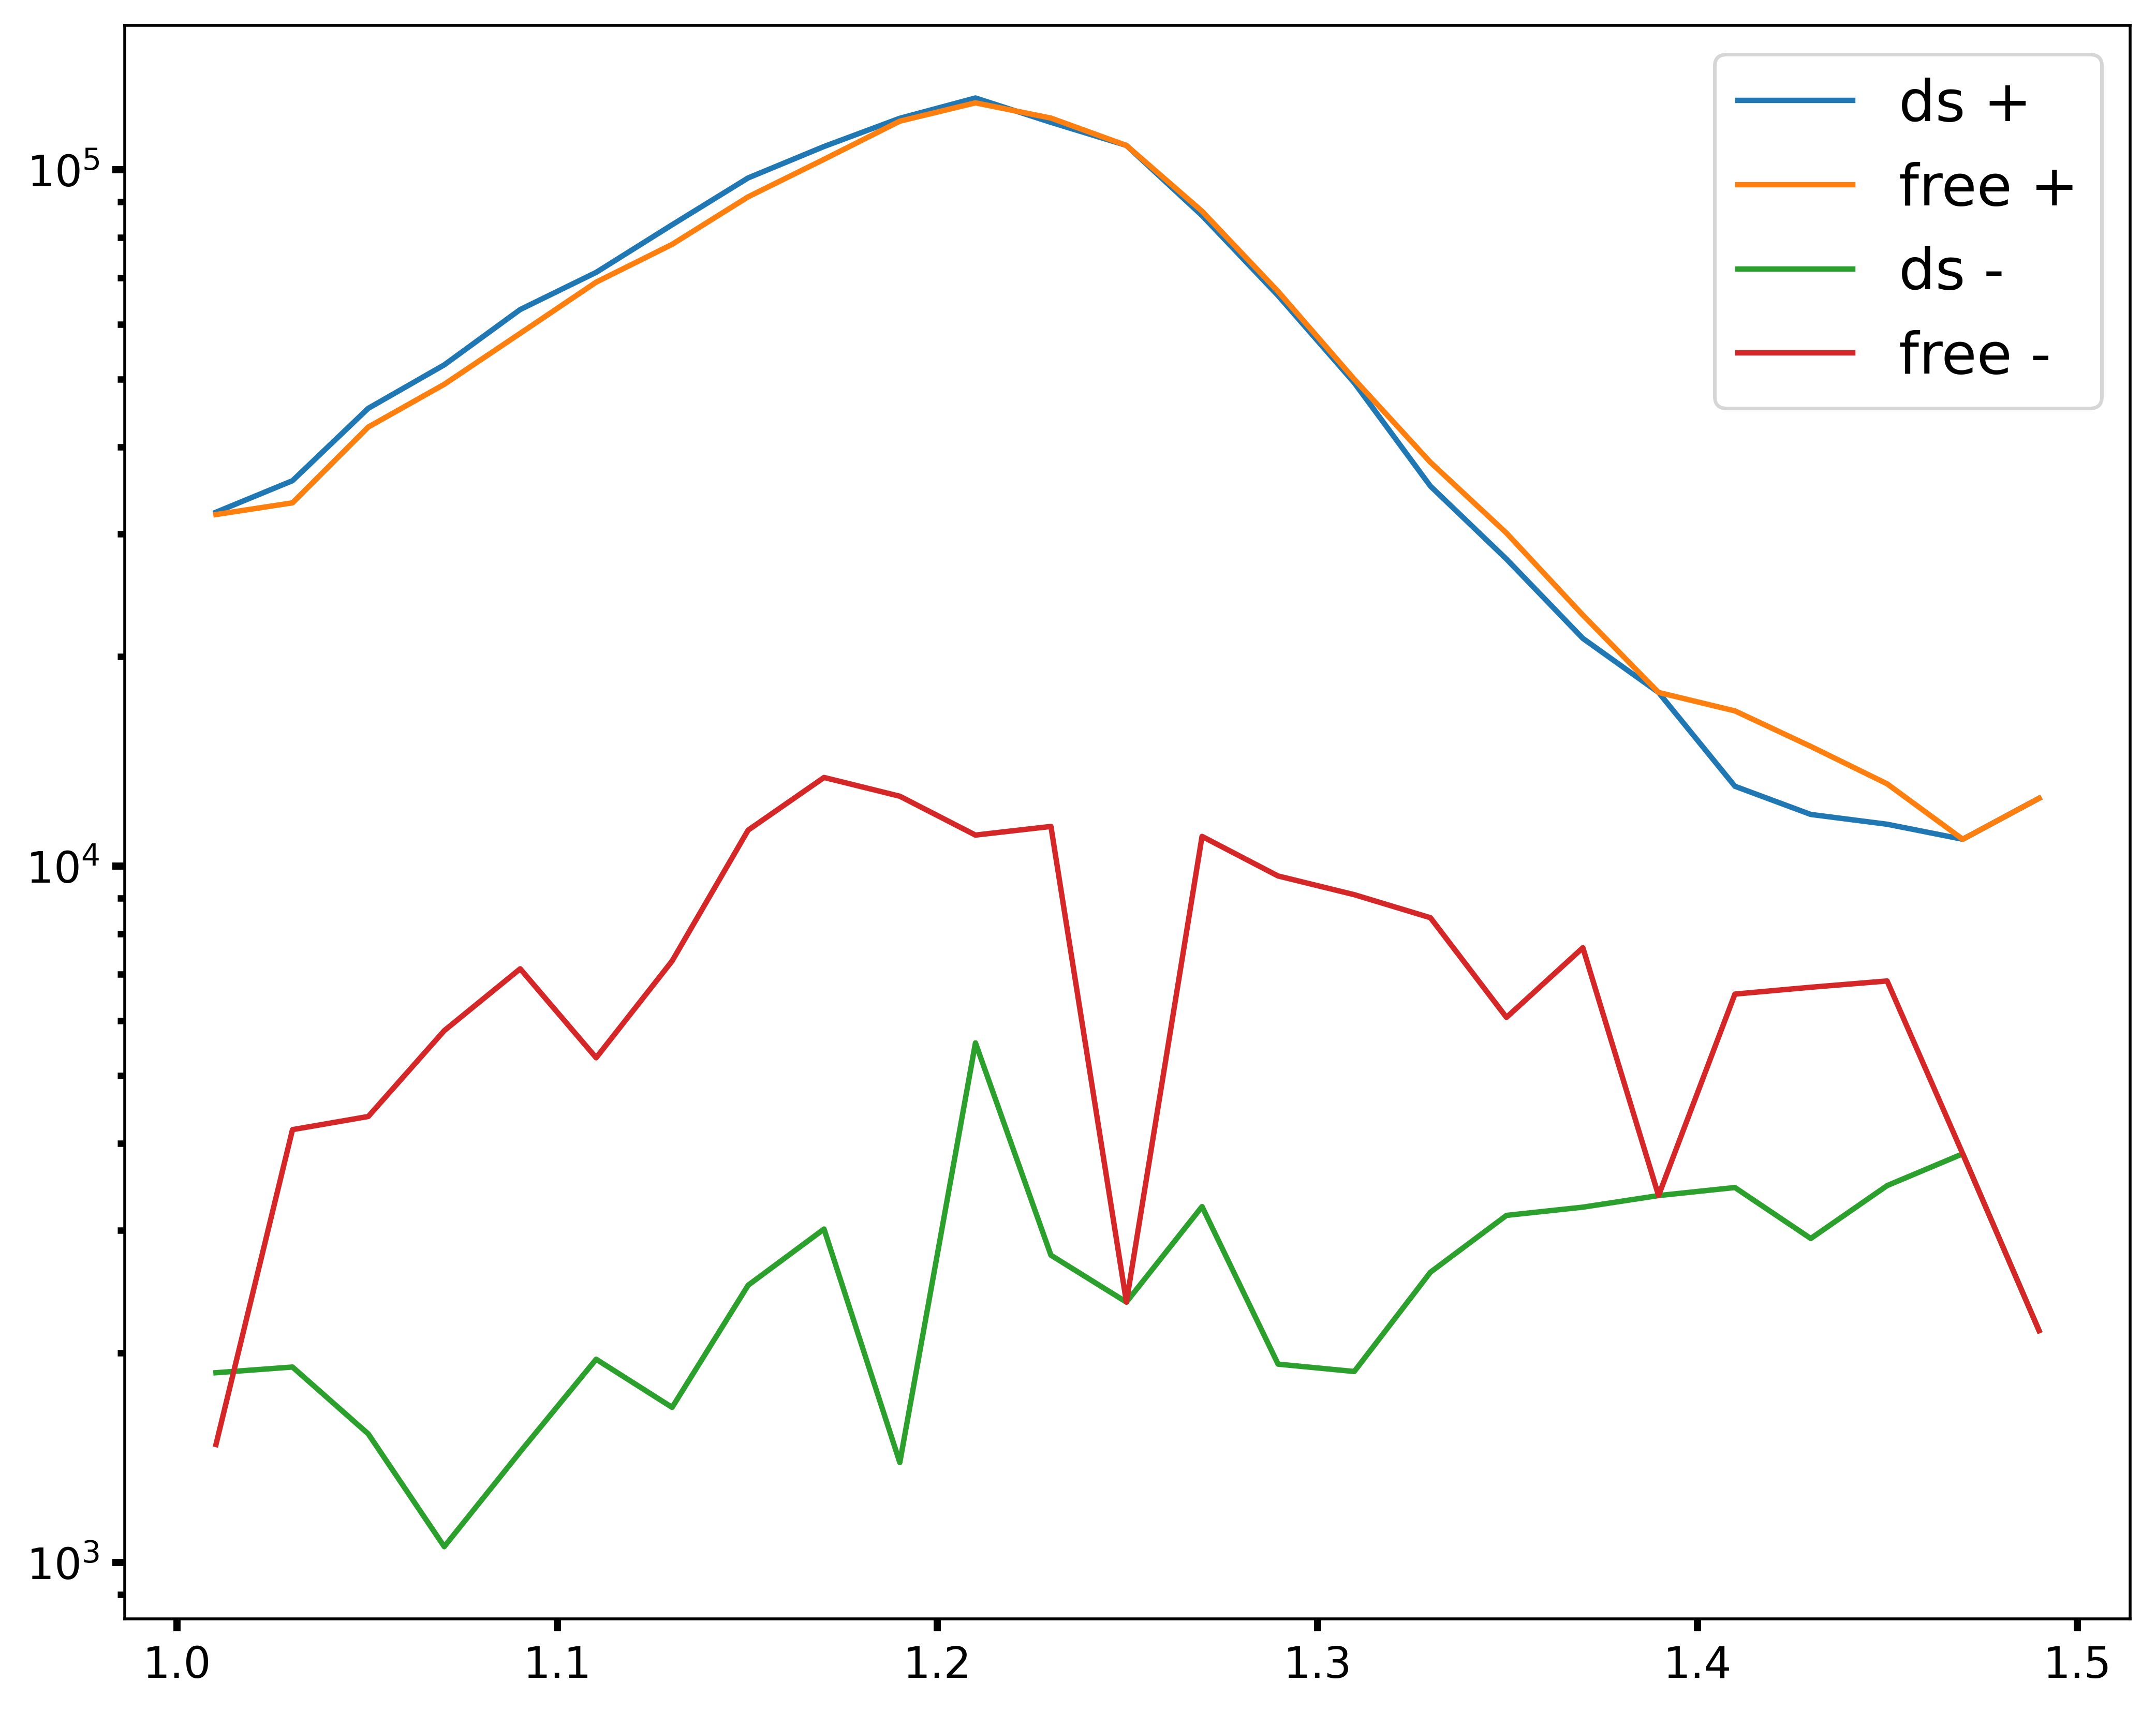

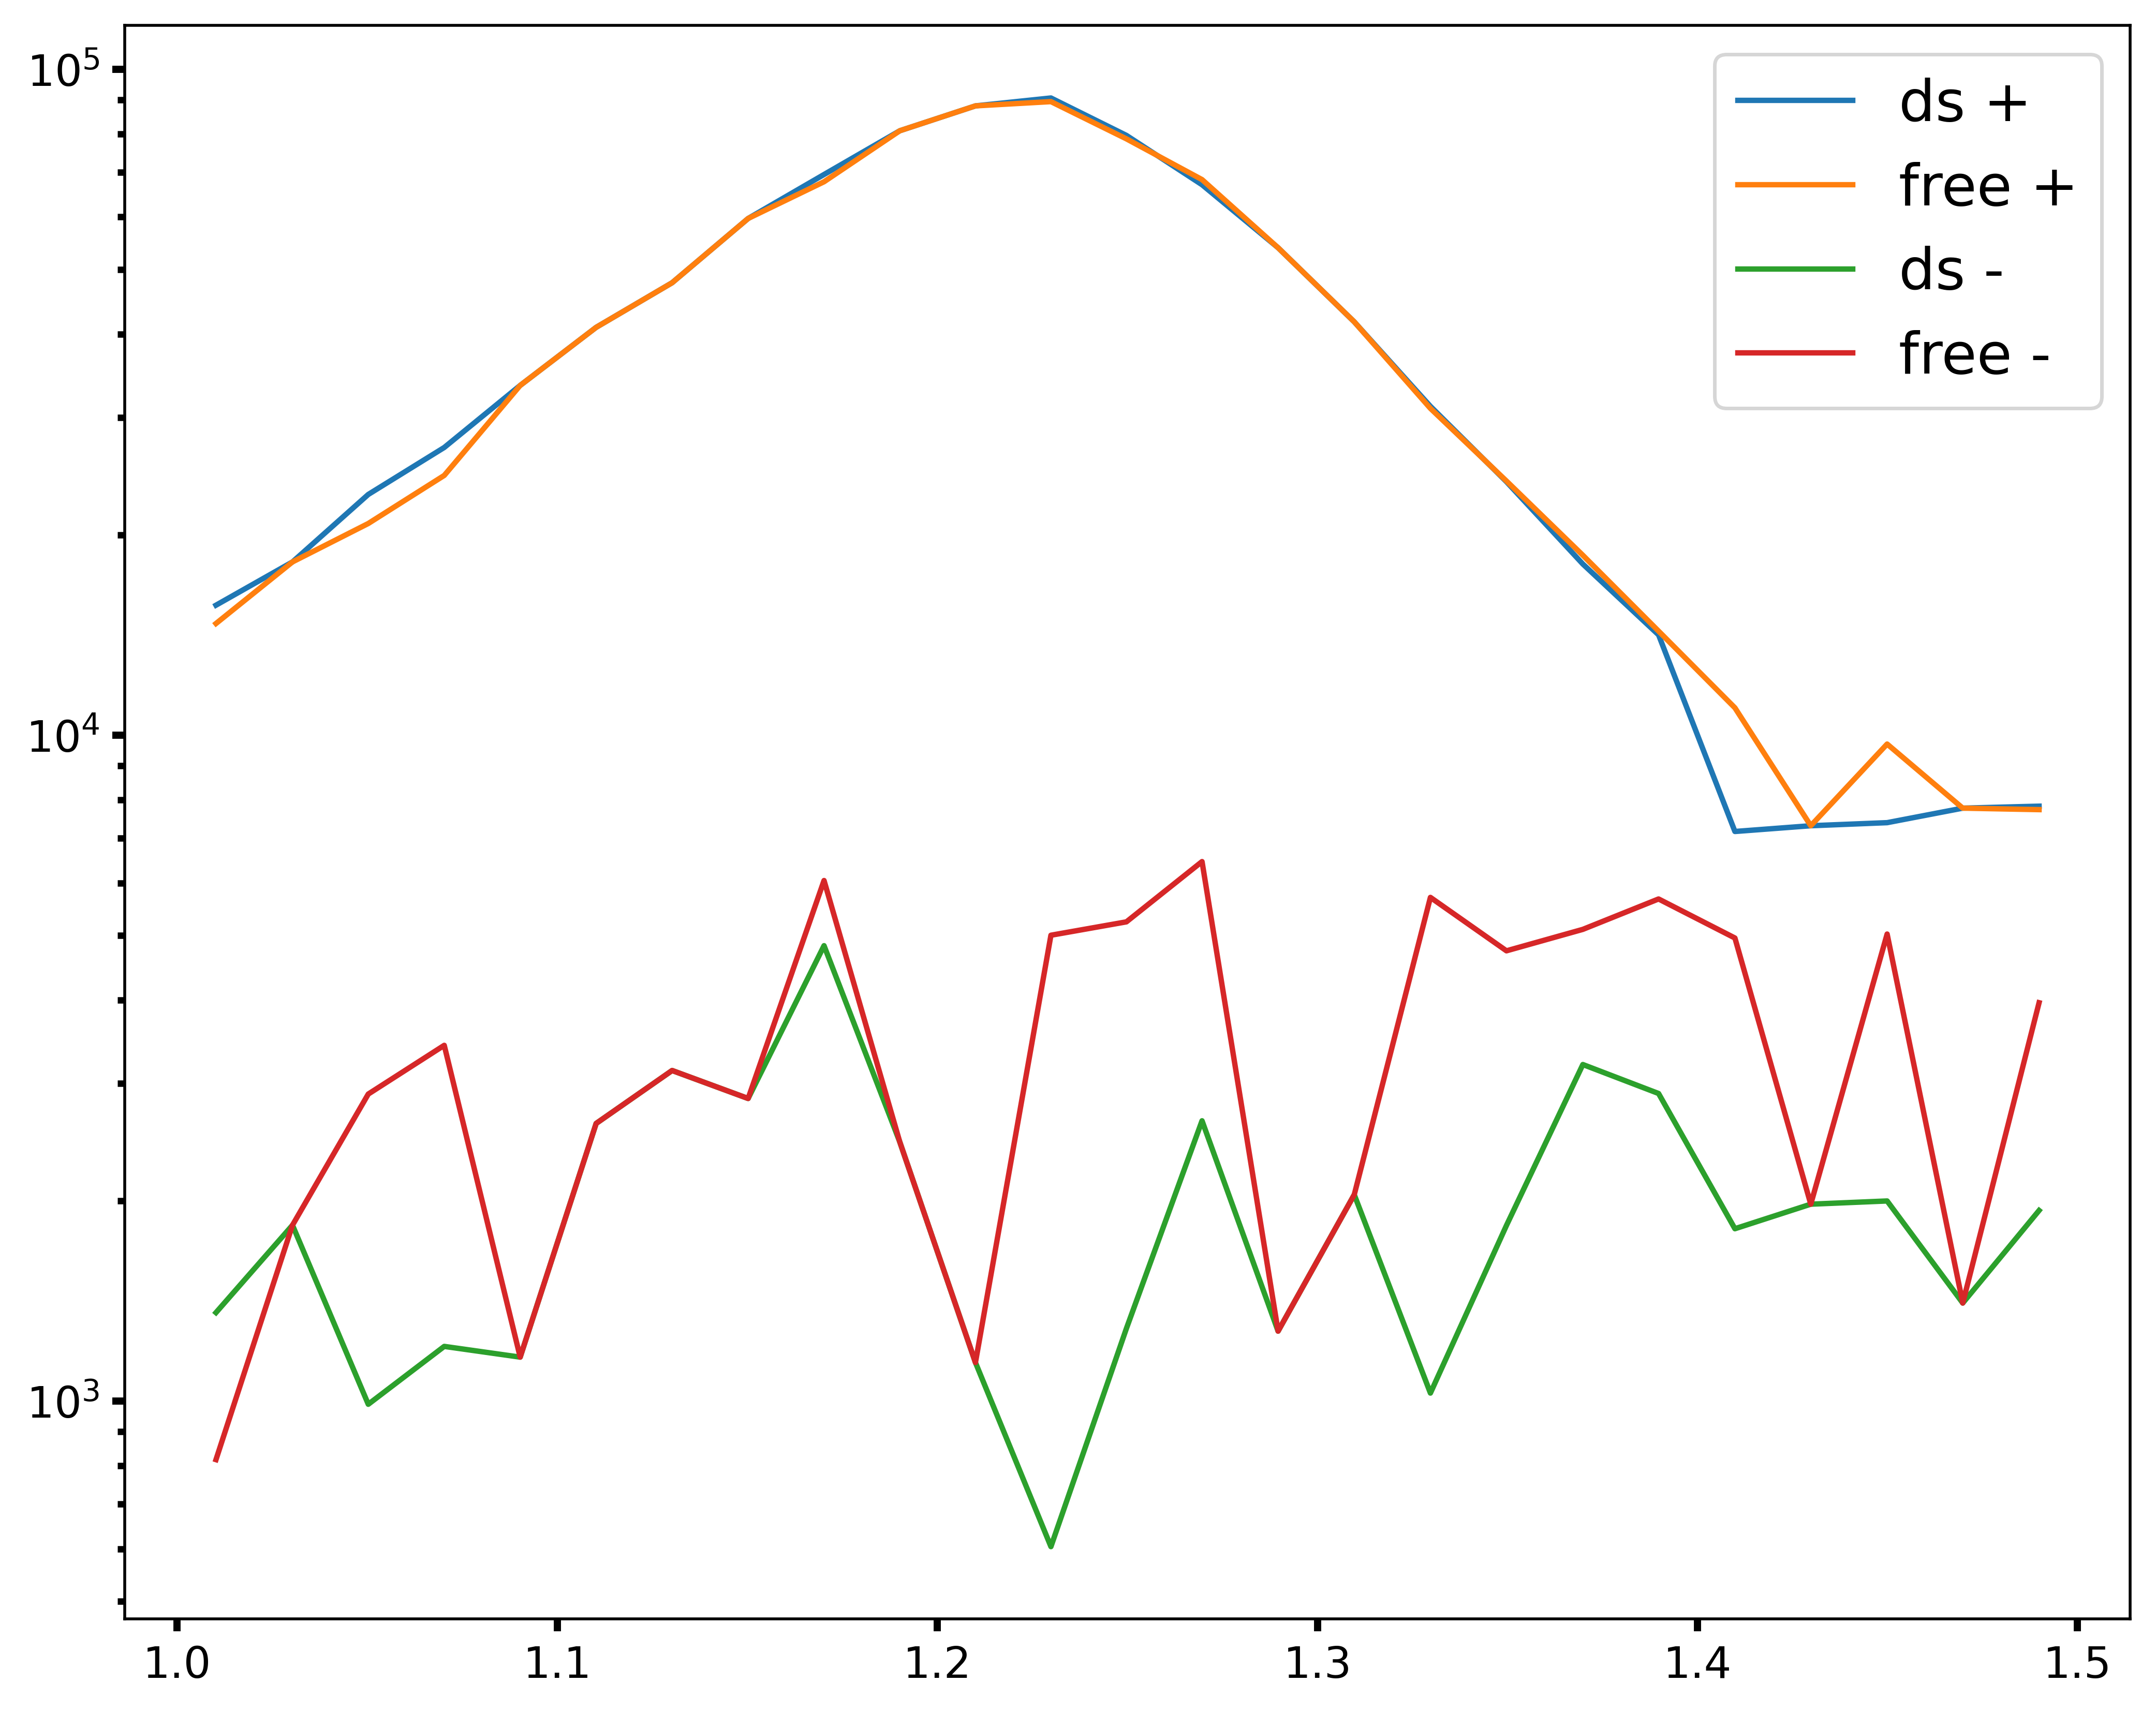

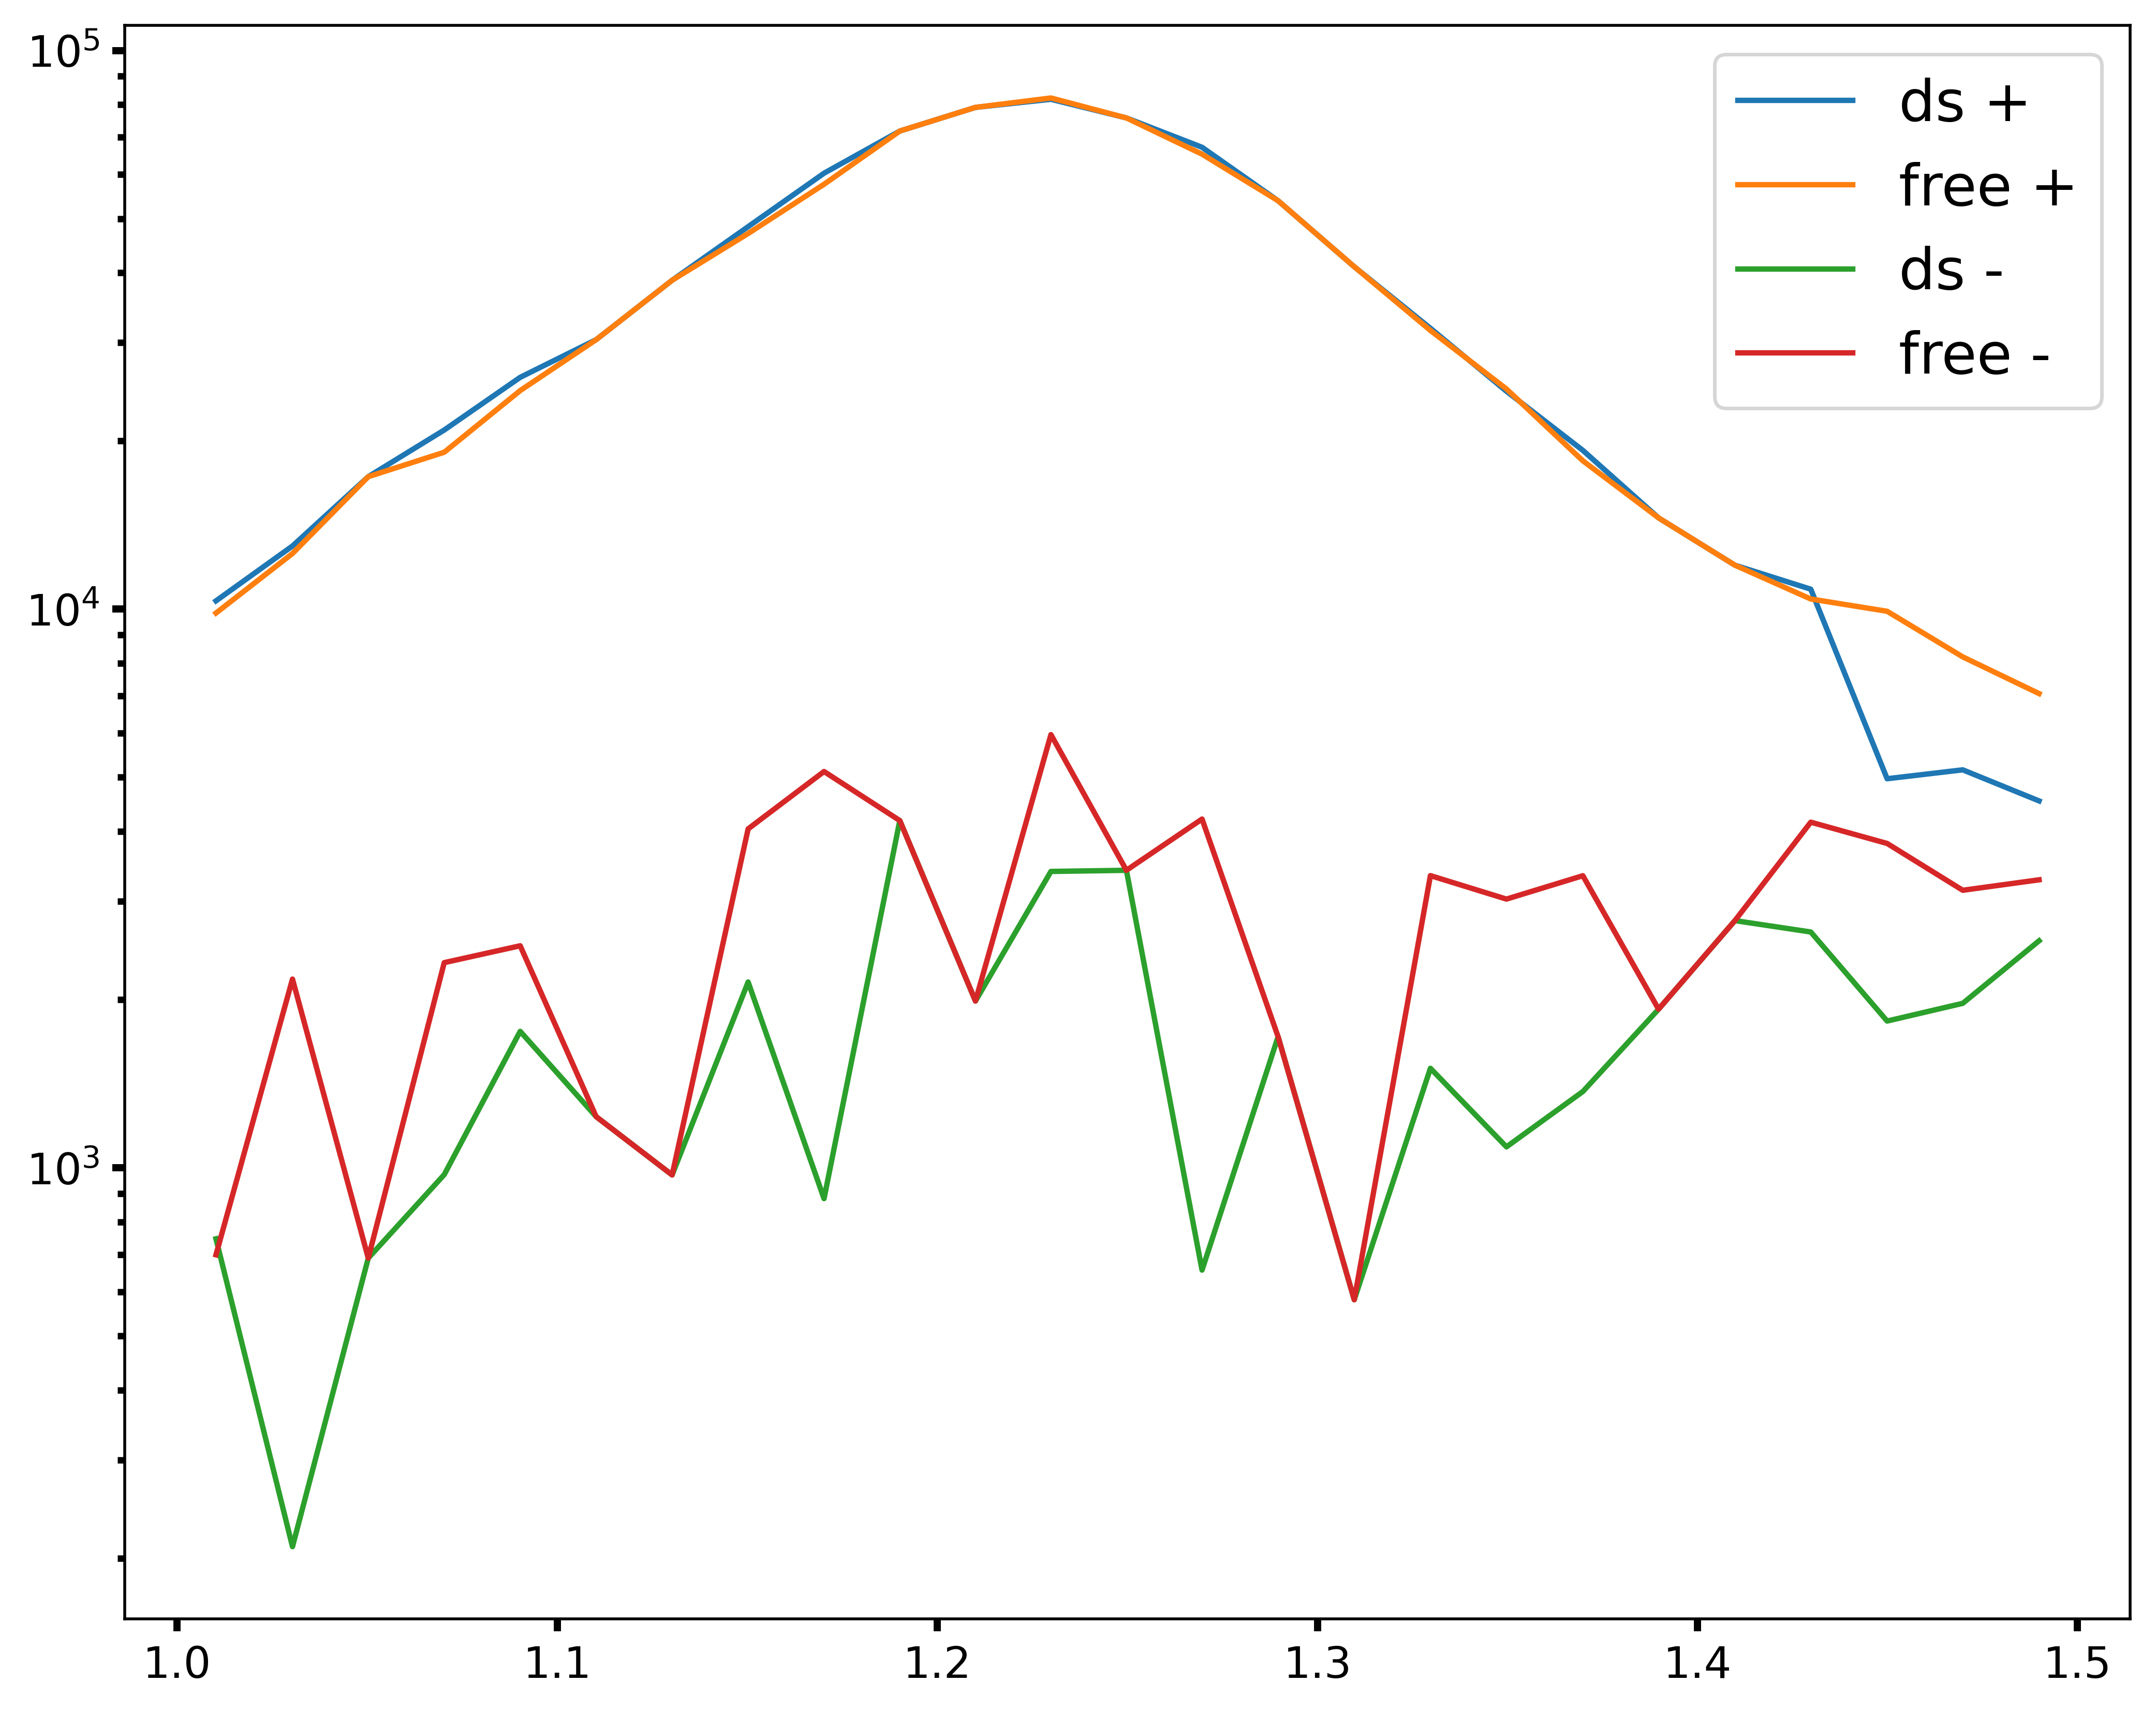

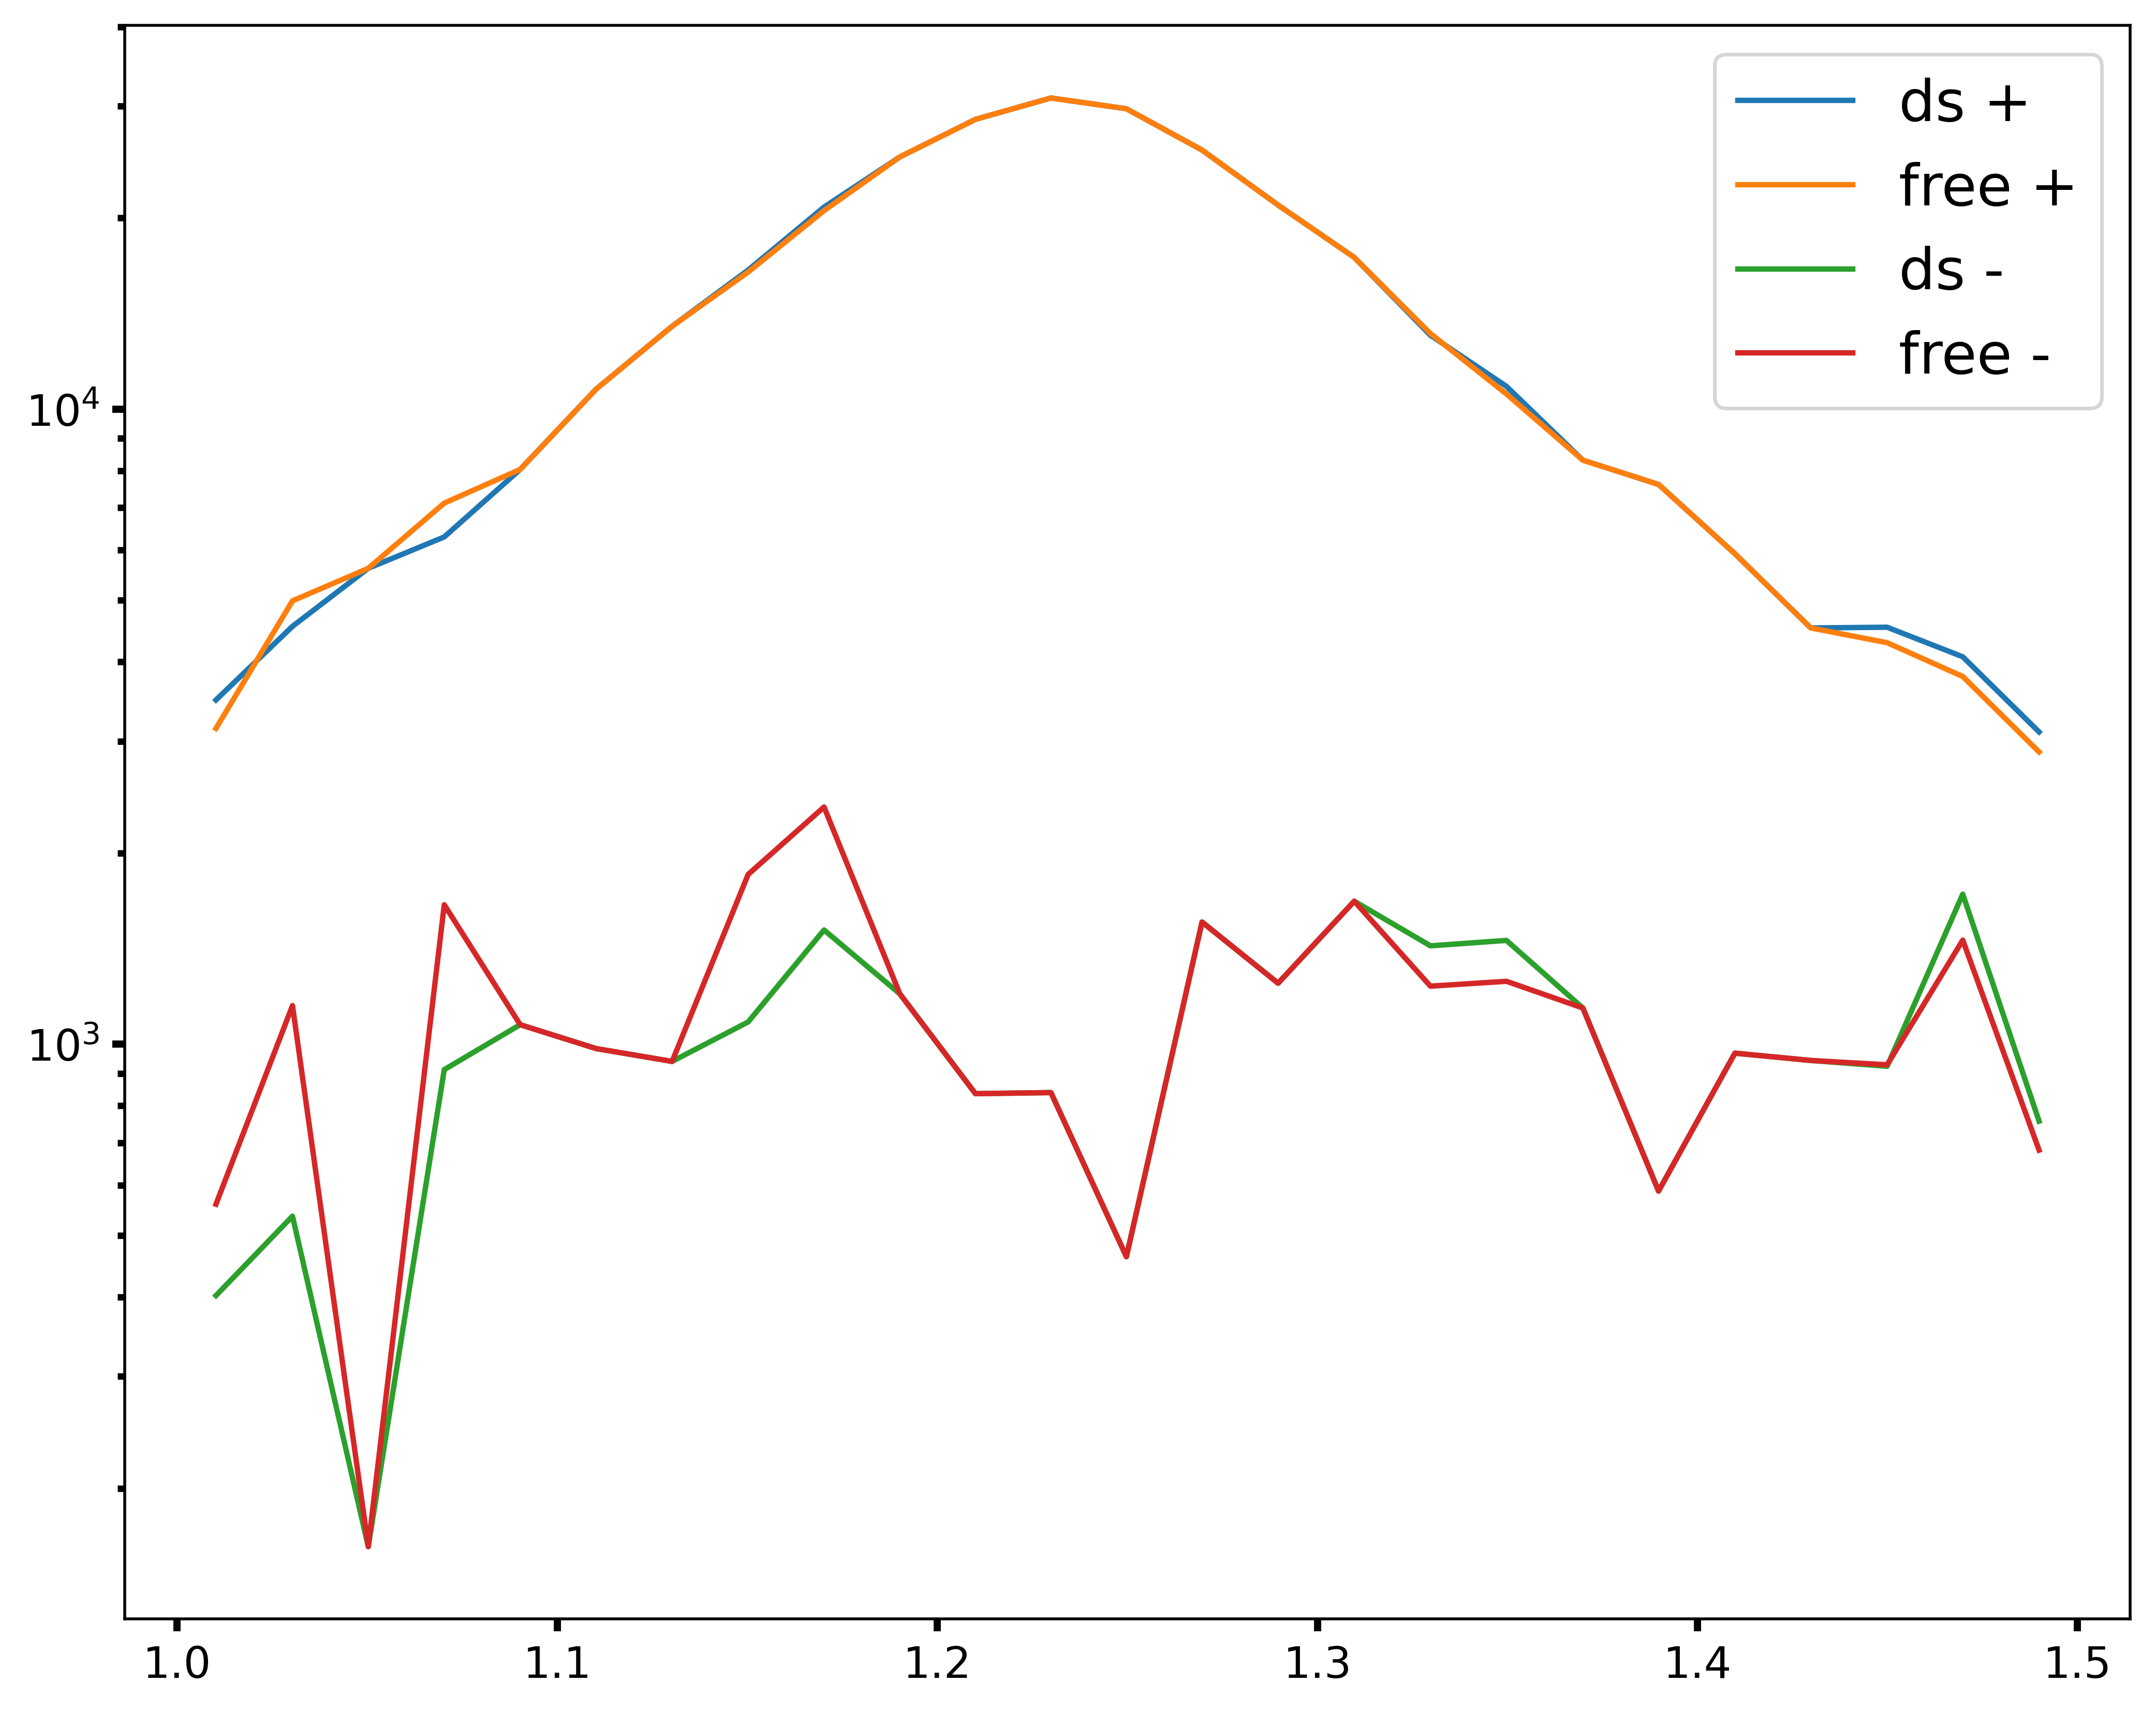

In [2]:
# loop over all csv's and collect them into 2 lists
path = f"{parent_dir}/analysis/data/ds_constraint_compare"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

df_list = []
df_data_list = []
for csv in csv_files:
    # the following assumes string always in form "mass-cut_t-bin1-bin2(_data).csv". () denote its optional    
    if "data" in csv: # data files here are unaffected by the D/S ratio constraint
        t_range = csv[2:9]        
        print(f"Adding data df:\t{csv}")                
        df_data = pd.read_csv(f"{path}/{csv}")            
        df_data["t"] = t_range
        df_data_list.append(df_data)
    else:
        i = csv.index("_")    
        t_range = csv[i+3:i+10]
        constraint = csv[0:i]
        print(f"Adding fit df:\t{csv}")
        df = pd.read_csv(f"{path}/{csv}", index_col="index")
        df["constrained"] = "true" if constraint=="constrained" else "false"
        df["t"] = t_range
        pwa_tools.wrap_phases(df)
        df_list.append(df)

df = pd.concat(df_list)
df_data = pd.concat(df_data_list)

MASS_BINS = df_data[df_data["t"]=="0.1-0.2"]["mean"]

t_cuts = ["0.1-0.2", "0.2-0.3", "0.3-0.5", "0.5-0.9"]
for t_cut in t_cuts:
    plt.plot(MASS_BINS, df[(df["t"]==t_cut) & (df["constrained"]=="true")]["p1p"], label="ds +")
    plt.plot(MASS_BINS, df[(df["t"]==t_cut) & (df["constrained"]=="false")]["p1p"], label="free +")

    plt.plot(MASS_BINS, df[(df["t"]==t_cut) & (df["constrained"]=="true")]["m1p"], label="ds -")
    plt.plot(MASS_BINS, df[(df["t"]==t_cut) & (df["constrained"]=="false")]["m1p"], label="free -")

    plt.legend()
    plt.yscale("log")
    plt.show()    

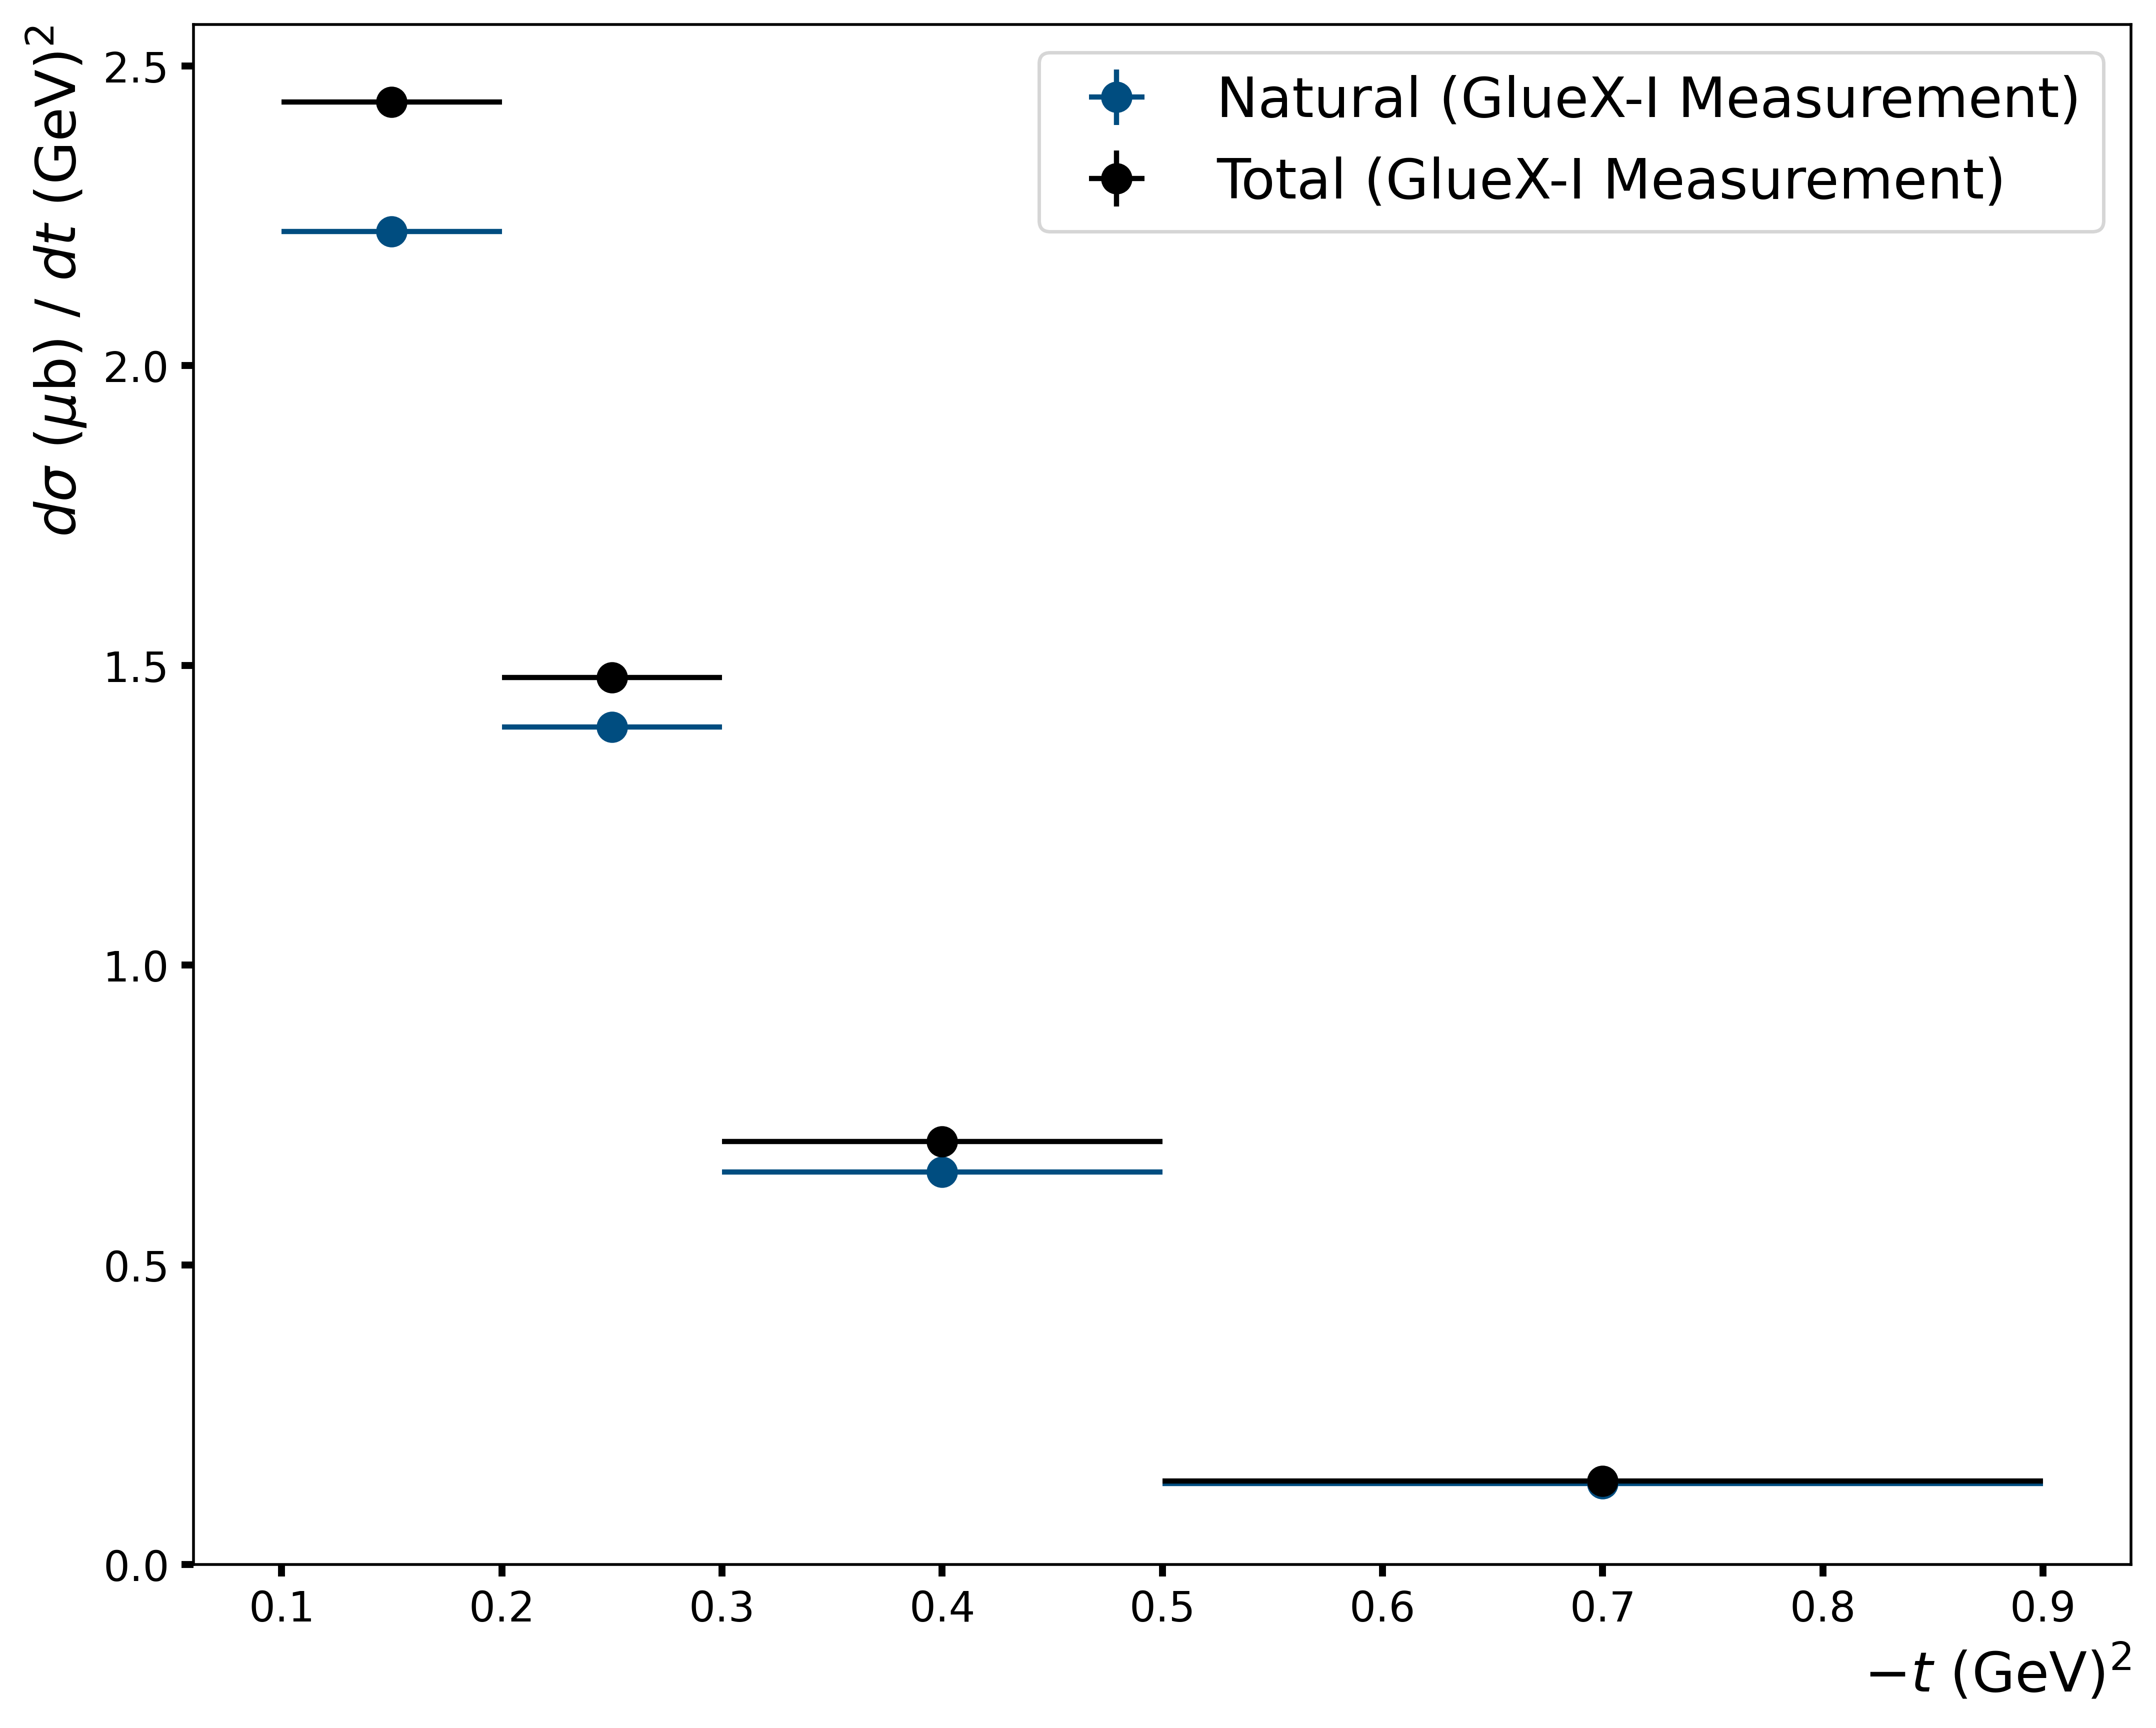

In [16]:
import scipy.integrate as integrate
def breit_wigner(x, m, width):
    gamma = math.sqrt(m**2 * (m**2 + width**2))

    k = (2 * math.sqrt(2) * m * width * gamma) / (math.pi * math.sqrt(m**2 + gamma))

    result = k / ((x**2 - m**2) ** 2 + m**2 * width**2)

    return result

cs_path = f"{parent_dir}/analysis/data/cross_section"

df_cs = pd.read_csv(f"{cs_path}/free_1.4_m-1.22-1.24.csv", index_col="index")
# bin_df = pd.read_csv()

total_int = integrate.quad(breit_wigner, 0, math.inf, args=(1.235, 0.142))
bin_int = integrate.quad(breit_wigner, 1.22, 1.24, args=(1.235, 0.142))
frac = 1 / (bin_int[0] / total_int[0])

# plot params
LUM = 117858000  # ub^{-1} (old 125000000)
BF = 0.892  # omega->3pi branching fraction (from pdg)

t_bins = [0.15, 0.25, 0.4, 0.7]
bin_error = np.array([0.1, 0.1, 0.2, 0.4])
t_width = np.array([0.1, 0.1, 0.2, 0.4])

# plot coherent sum of negative refl m-projections
plt.errorbar(
    t_bins,
    (df_cs["p1p"]) / (BF * LUM * t_width) * frac,
    (df_cs["p1p_err"]) / (BF * LUM * t_width) * frac,
    bin_error/2,
    color="#004D80",
    marker=".",
    markersize=16,
    linestyle="",
    label="Natural (GlueX-I Measurement)",
)
plt.errorbar(
    t_bins, 
    (df_cs["1p"])/(BF*LUM*t_width)*frac, 
    (df_cs["1p_err"])/(BF*LUM*t_width)*frac, bin_error/2, 
    color="black", marker=".", markersize=16, 
    label=r"Total (GlueX-I Measurement)", linestyle=""
)



# Cosmetics
plt.xlabel(r"$-t$ (GeV)$^{{2}}$", loc="right")
plt.ylabel(r"$d\sigma$ ($\mu$b) / $dt$ (GeV)$^2$", loc="top")
plt.gca().set_ylim(bottom=0)

plt.legend()
plt.show()